## **Importing Libraries📚**

In [146]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
import os
from itertools import product

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ieeenu-cis-ai-competition/sample_submission.csv
/kaggle/input/ieeenu-cis-ai-competition/data_descriptions.csv
/kaggle/input/ieeenu-cis-ai-competition/train.csv
/kaggle/input/ieeenu-cis-ai-competition/test.csv


In [147]:
data = pd.read_csv("/kaggle/input/ieeenu-cis-ai-competition/data_descriptions.csv")
df = pd.read_csv("/kaggle/input/ieeenu-cis-ai-competition/train.csv")
test = pd.read_csv("/kaggle/input/ieeenu-cis-ai-competition/test.csv")


## **Data Exploration🔍**

In [148]:
data

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observe...
2,is_retained,Target,Integer,TRAINING SET ONLY! 0 = the learner cancelled t...
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each su...
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,primary domain of the specialization (Computer...
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""p..."
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""g..."
8,learner_days_since_registration,Feature - Learner Info,integer,Days from registration date to the date on whi...
9,learner_country_group,Feature - Learner Info,character,the region of the world that the learner is fr...


In [149]:
df = df.drop(columns=['ID','subscription_id', 'observation_dt', 'specialization_id'])
df

,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,...,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity,is_retained
0,6,Business,True,True,43,Non-Brazil Latin America,male,1,1,144,...,1,14,1,False,2.183333,3.150000,1,2,5,1
1,4,Personal Development,False,False,587,United States,female,1,0,8,...,0,0,0,False,3.416667,0.000000,6,0,154,1
2,4,Computer Science,False,False,1389,Africa and developing Middle East,unknown,1,0,34,...,0,0,0,False,6.800000,0.000000,9,0,149,1
3,6,Data Science,True,False,287,East Asia,unknown,0,0,0,...,0,0,0,False,2.800000,0.000000,7,0,19,1
4,8,Data Science,True,True,35,United States,unknown,0,0,0,...,0,0,0,False,32.500000,0.000000,17,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331157,6,Information Technology,True,False,8,Russia and neighbors,male,0,0,0,...,0,0,0,False,0.266667,0.000000,2,0,7,0
331158,7,Business,False,False,3209,Non-Brazil Latin America,male,15,6,411,...,1,21,0,False,0.000000,1.216667,0,4,12,0
331159,7,Computer Science,True,True,2570,United States,male,2,1,4,...,0,0,0,False,0.000000,0.000000,1,0,69,0
331160,5,Information Technology,True,True,382,United States,unknown,0,0,0,...,1,4,0,False,3.383333,1.566667,3,5,2,1


In [150]:
correlation_matrix = df.corr()
correlations_with_target = df.corr()['is_retained'].sort_values(ascending=False)
print(correlations_with_target)


/tmp/ipykernel_32/3524986237.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/tmp/ipykernel_32/3524986237.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_target = df.corr()['is_retained'].sort_values(ascending=False)


is_retained                                         1.000000
subscription_period_order                           0.233546
days_since_last_payment                             0.230107
cnt_days_since_last_activity                        0.186314
is_subscription_started_with_free_trial             0.170456
is_gateway_certificate                              0.098180
is_professional_certificate                         0.087149
cnt_courses_in_specialization                       0.059900
cnt_days_active_before_payment_period               0.027773
learner_other_revenue                               0.021050
learner_cnt_other_transactions_past                 0.020767
learner_days_since_registration                     0.001715
cnt_items_completed_before_payment_period          -0.012124
sum_hours_learning_before_payment_period           -0.016289
cnt_enrollments_started_before_payment_period      -0.029822
cnt_days_active_during_payment_period              -0.030509
cnt_enrollments_complete

In [151]:
df.describe()


,cnt_courses_in_specialization,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_other_revenue,subscription_period_order,days_since_last_payment,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity,is_retained
count,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,...,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000,331162.000000
mean,5.926942,745.599797,5.416941,1.282475,114.356369,63.063332,1.969284,101.445117,2.476030,12.397159,...,0.235299,0.682319,21.065717,1.746299,15.616470,3.481893,12.478871,2.591070,29.080613,0.543556
std,1.758998,950.850831,13.802305,3.748233,303.174264,194.861002,6.552866,355.218449,2.352794,8.651139,...,0.655389,0.949440,50.301966,4.417601,27.433124,8.468439,18.936795,4.066931,52.302548,0.498100
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.150000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,6.000000,280.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,6.183333,0.000000,6.000000,1.000000,9.000000,1.000000
75%,7.000000,1112.000000,4.000000,1.000000,90.000000,13.000000,1.000000,49.000000,3.000000,20.000000,...,0.000000,1.000000,20.000000,2.000000,18.666667,3.550000,15.000000,4.000000,32.000000,1.000000
max,13.000000,3857.000000,604.000000,188.000000,19439.000000,5810.000000,474.000000,24069.920000,19.000000,30.000000,...,10.000000,11.000000,1043.000000,135.000000,2375.683333,1393.300000,616.000000,31.000000,548.000000,1.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331162 entries, 0 to 331161
Data columns (total 34 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   cnt_courses_in_specialization                     331162 non-null  int64  
 1   specialization_domain                             331162 non-null  object 
 2   is_professional_certificate                       331162 non-null  bool   
 3   is_gateway_certificate                            331162 non-null  bool   
 4   learner_days_since_registration                   331162 non-null  int64  
 5   learner_country_group                             331162 non-null  object 
 6   learner_gender                                    331162 non-null  object 
 7   learner_cnt_other_courses_active                  331162 non-null  int64  
 8   learner_cnt_other_courses_paid_active             331162 non-null  int64  
 9   lear

## **Data Visualization📊** 

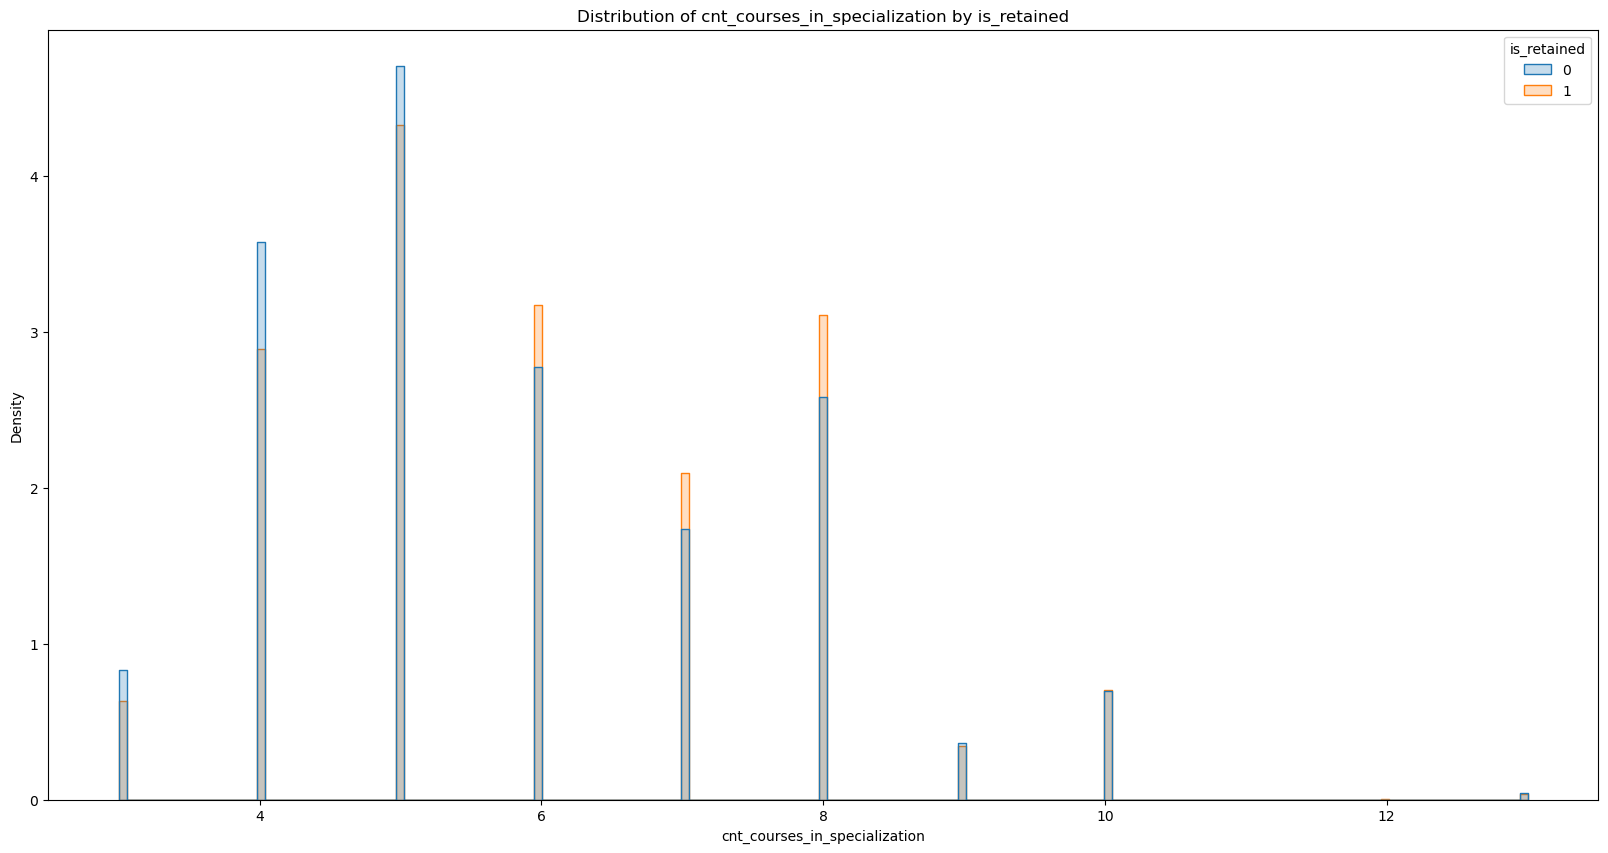

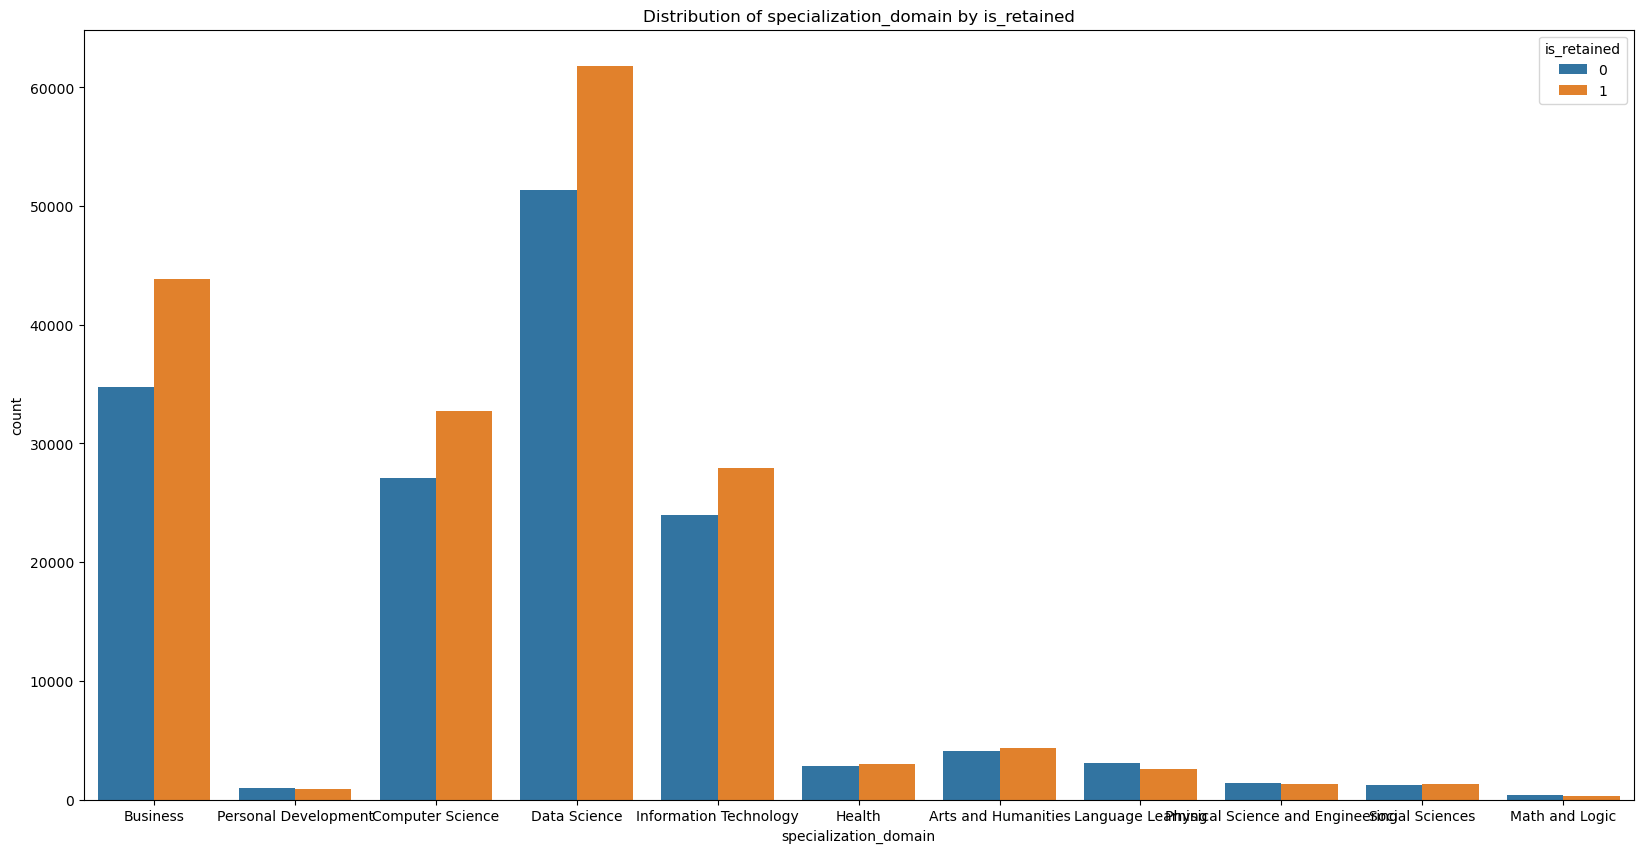

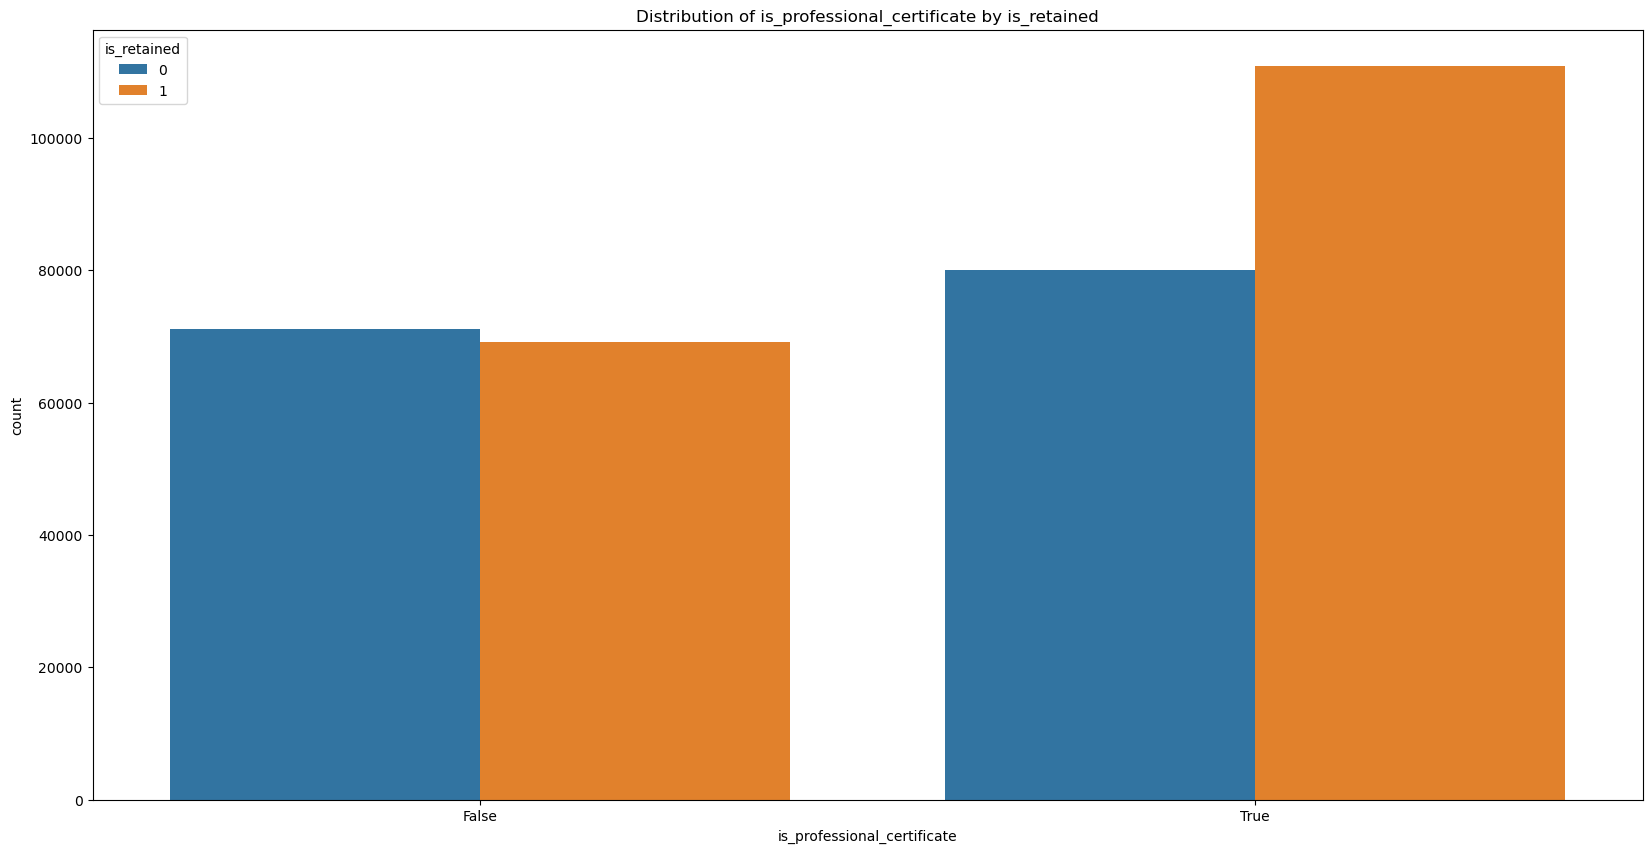

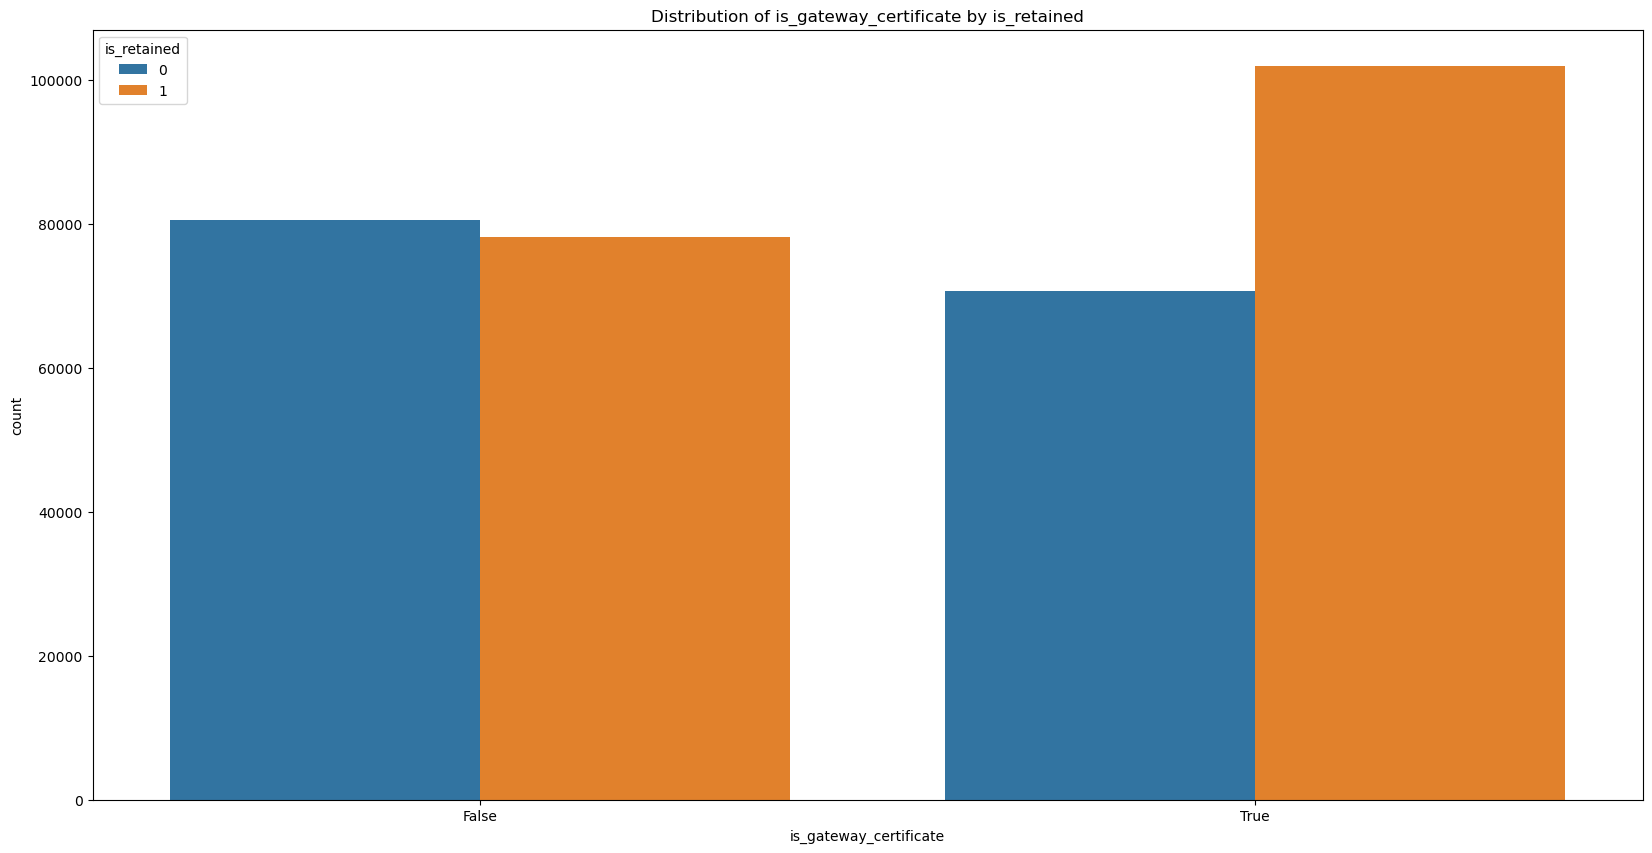

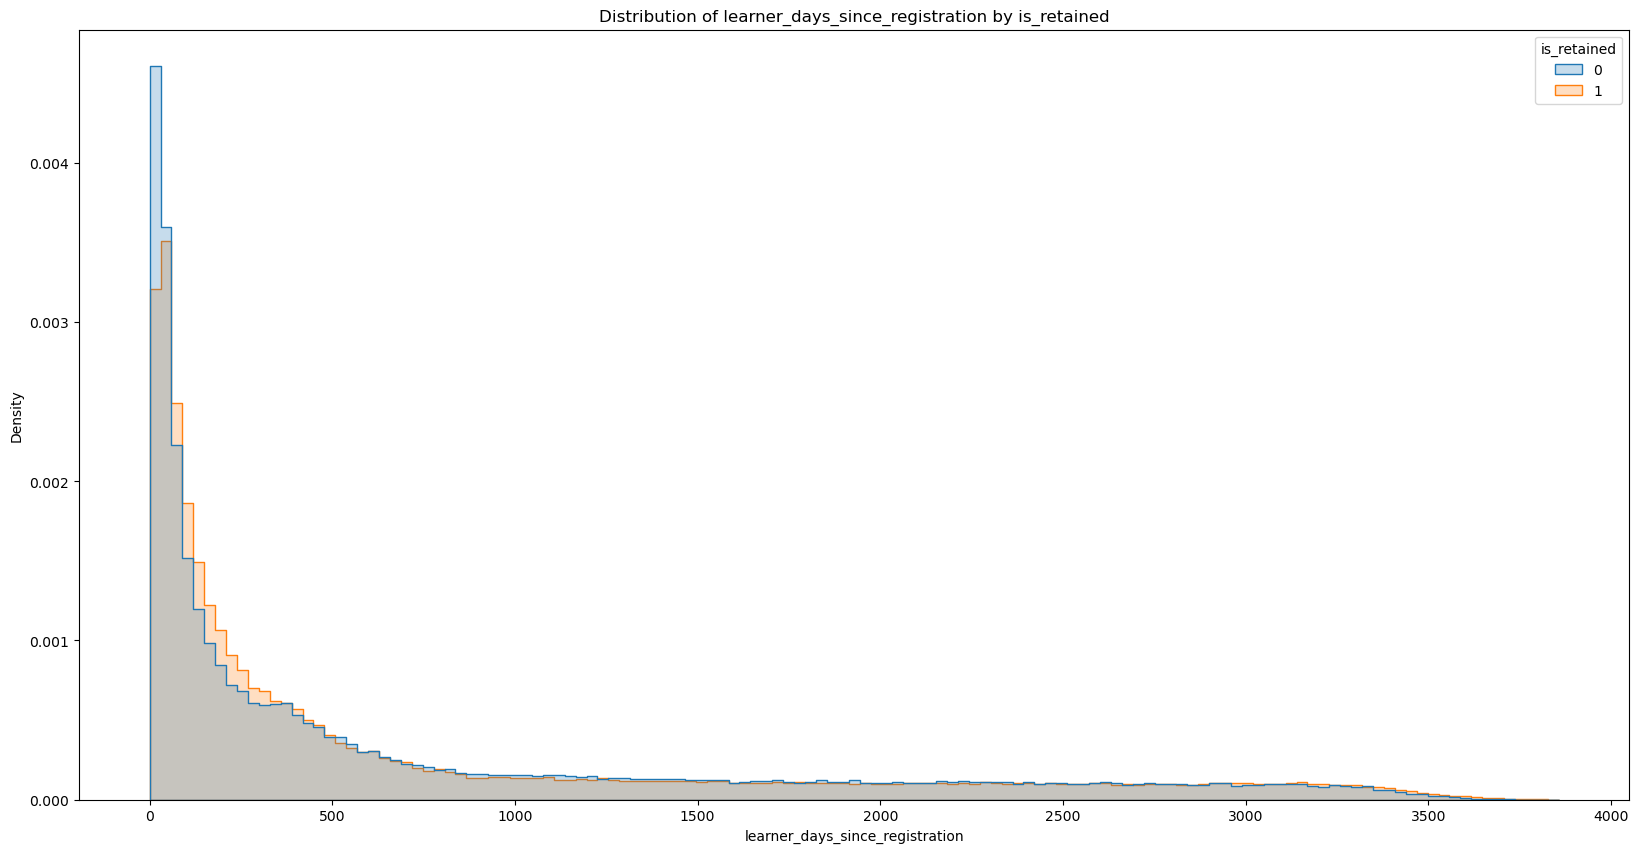

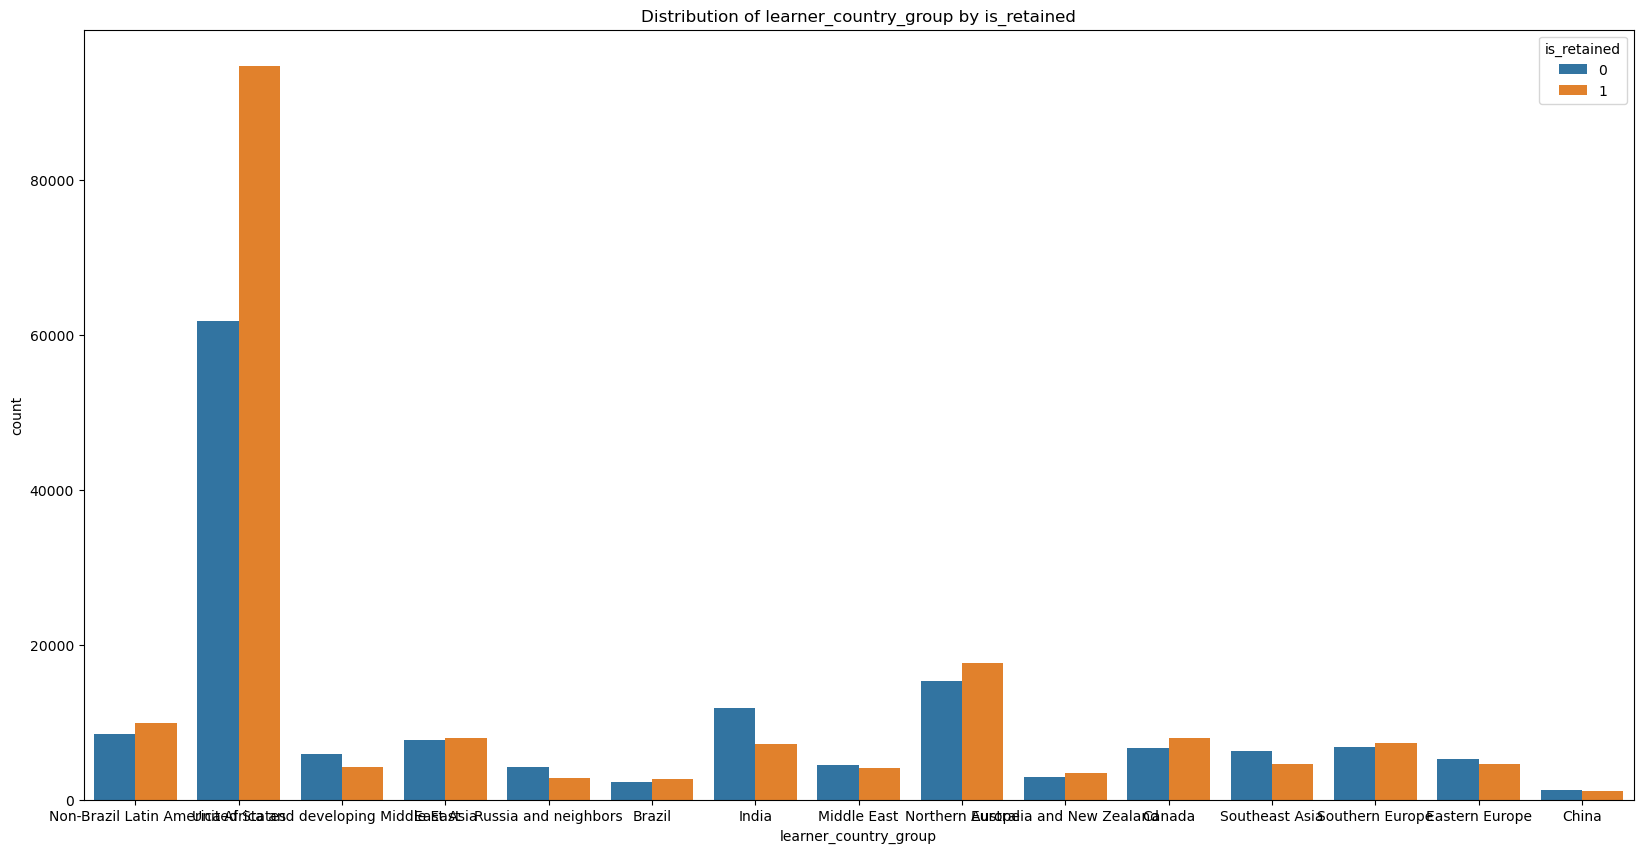

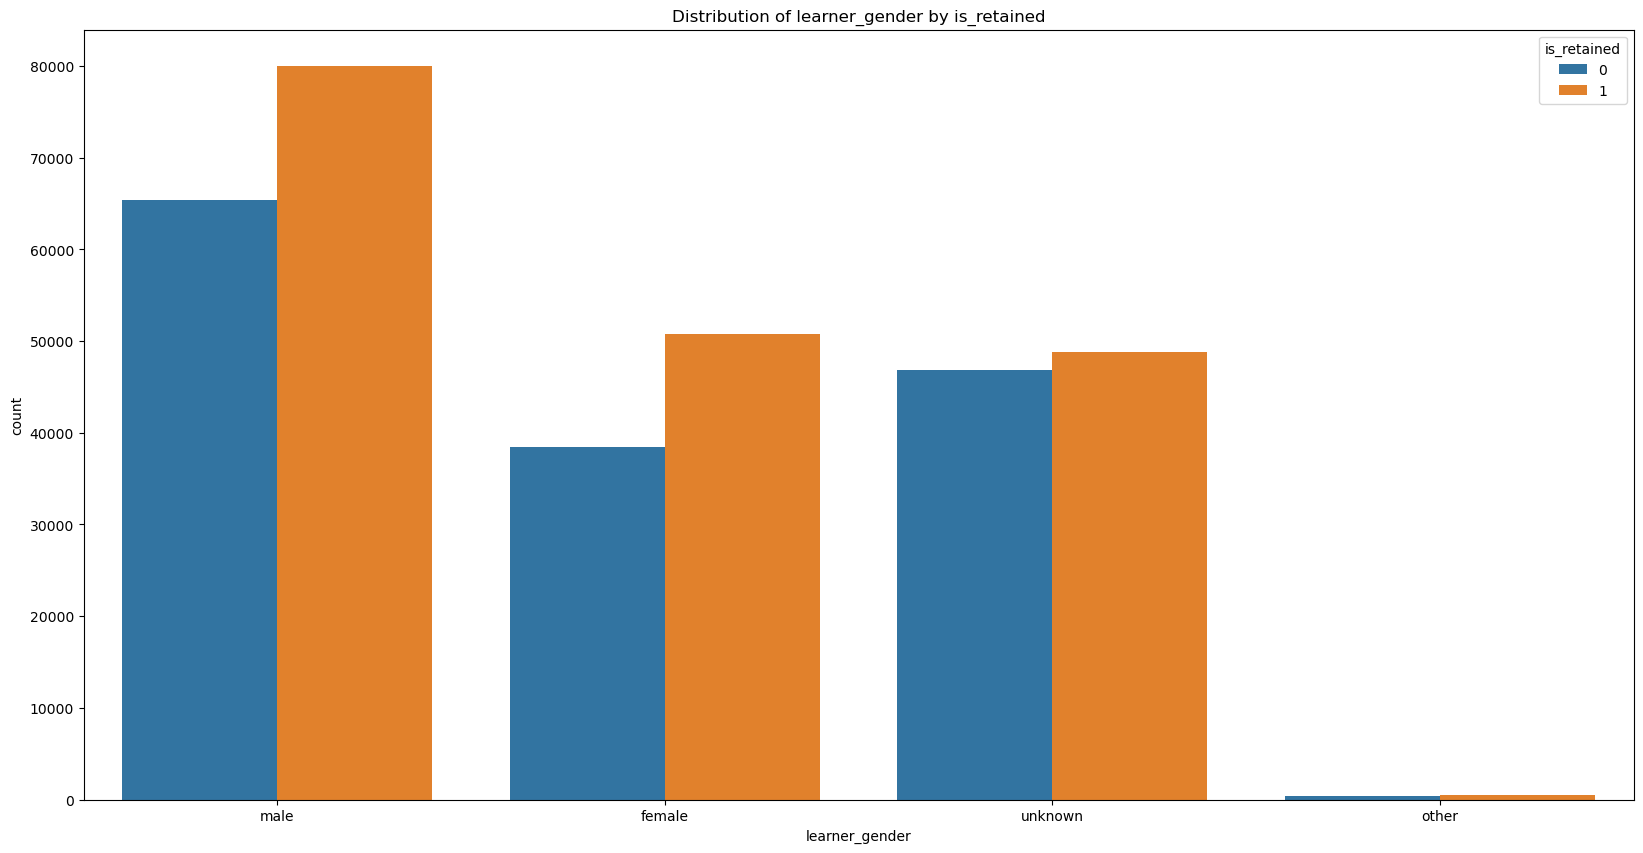

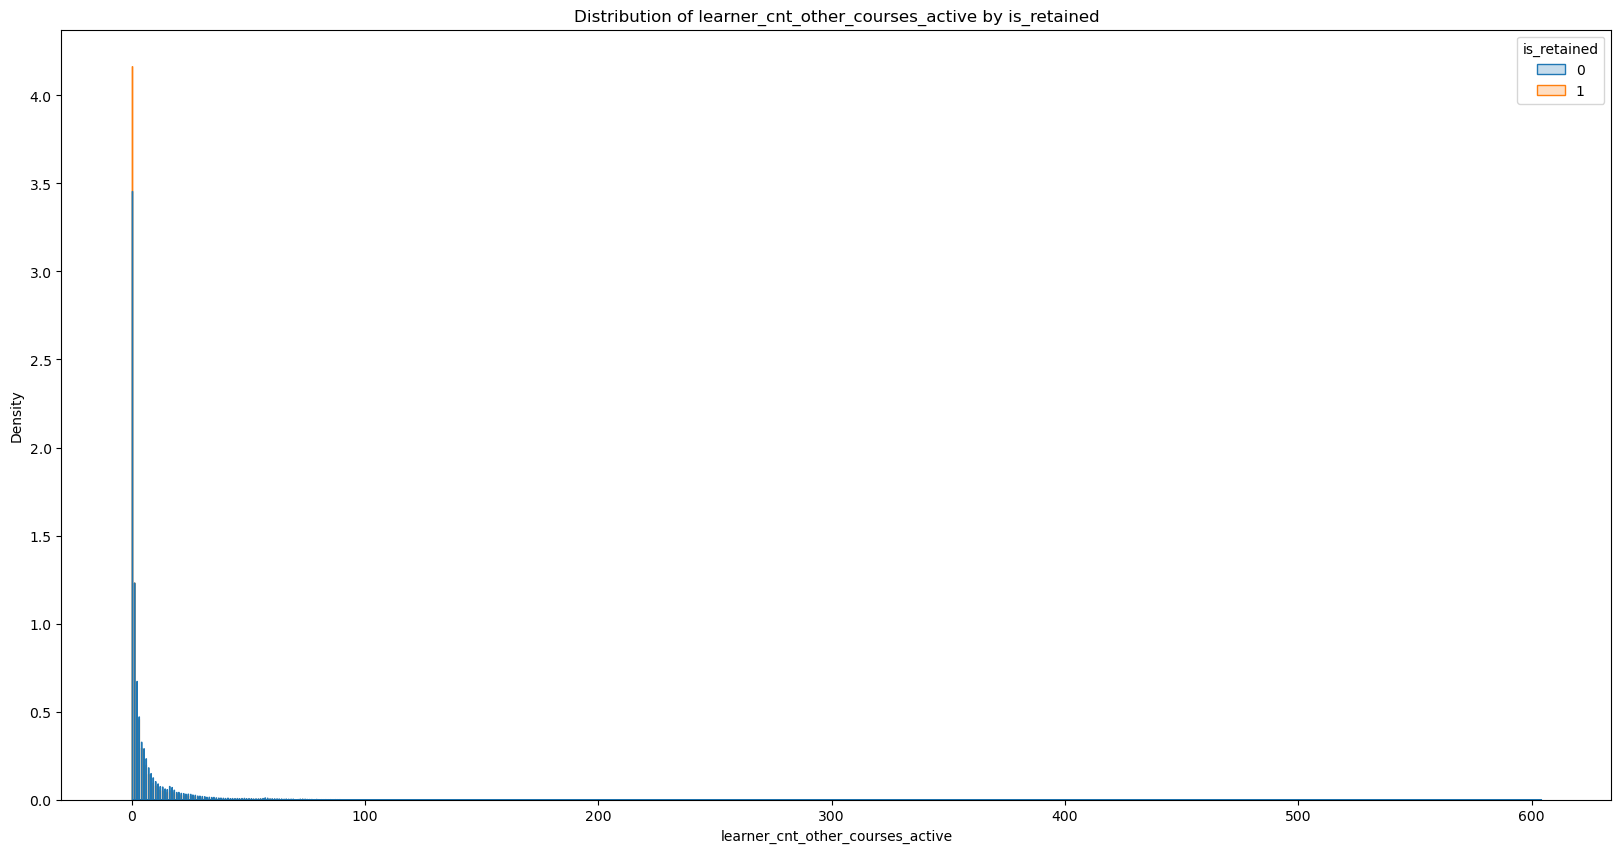

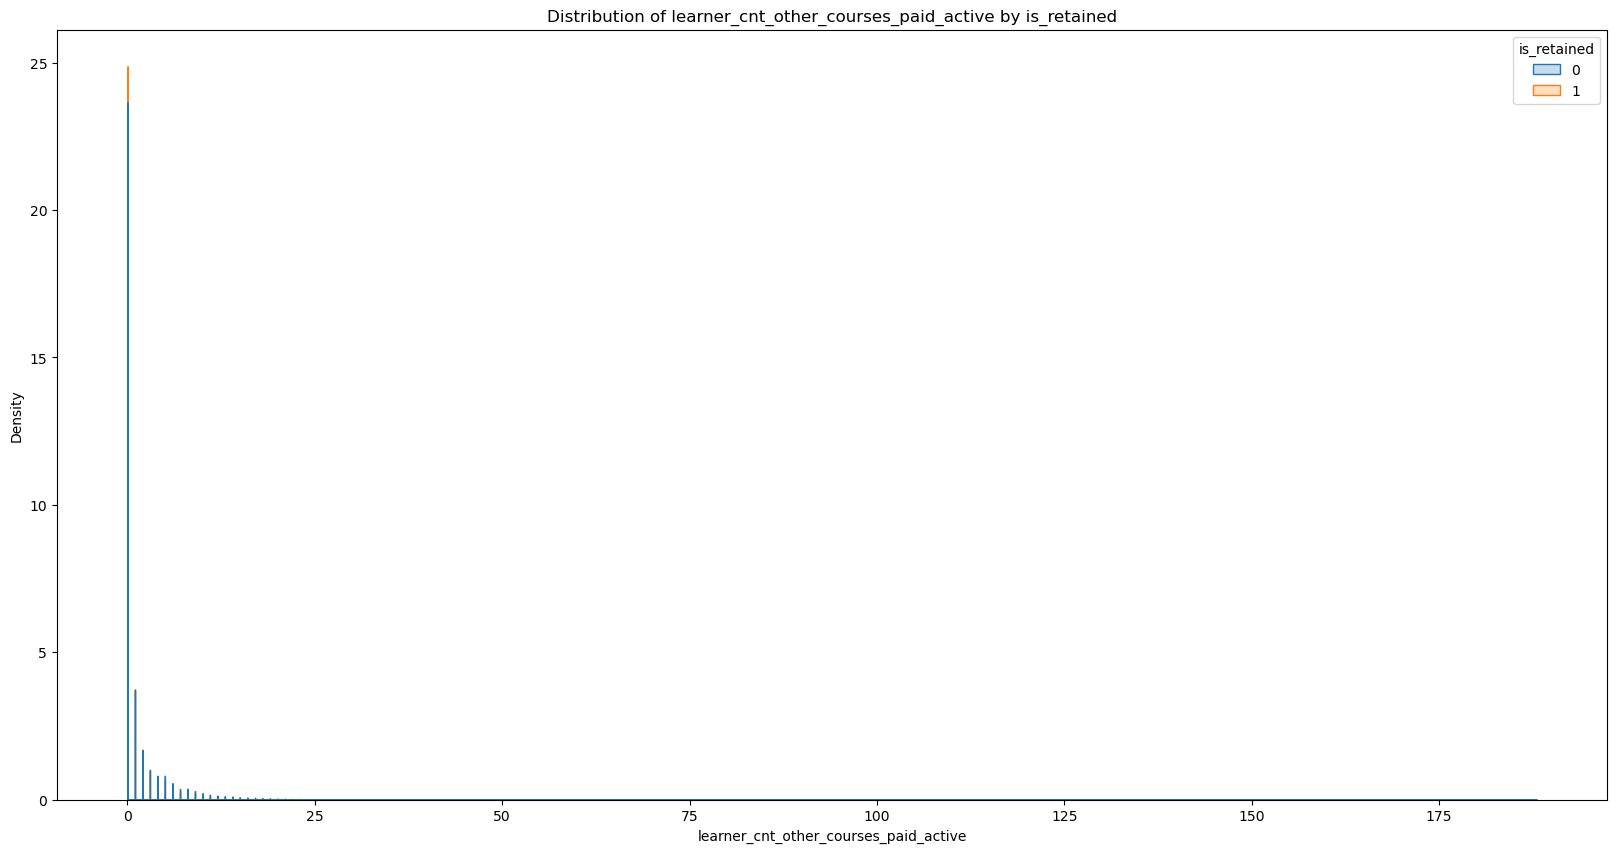

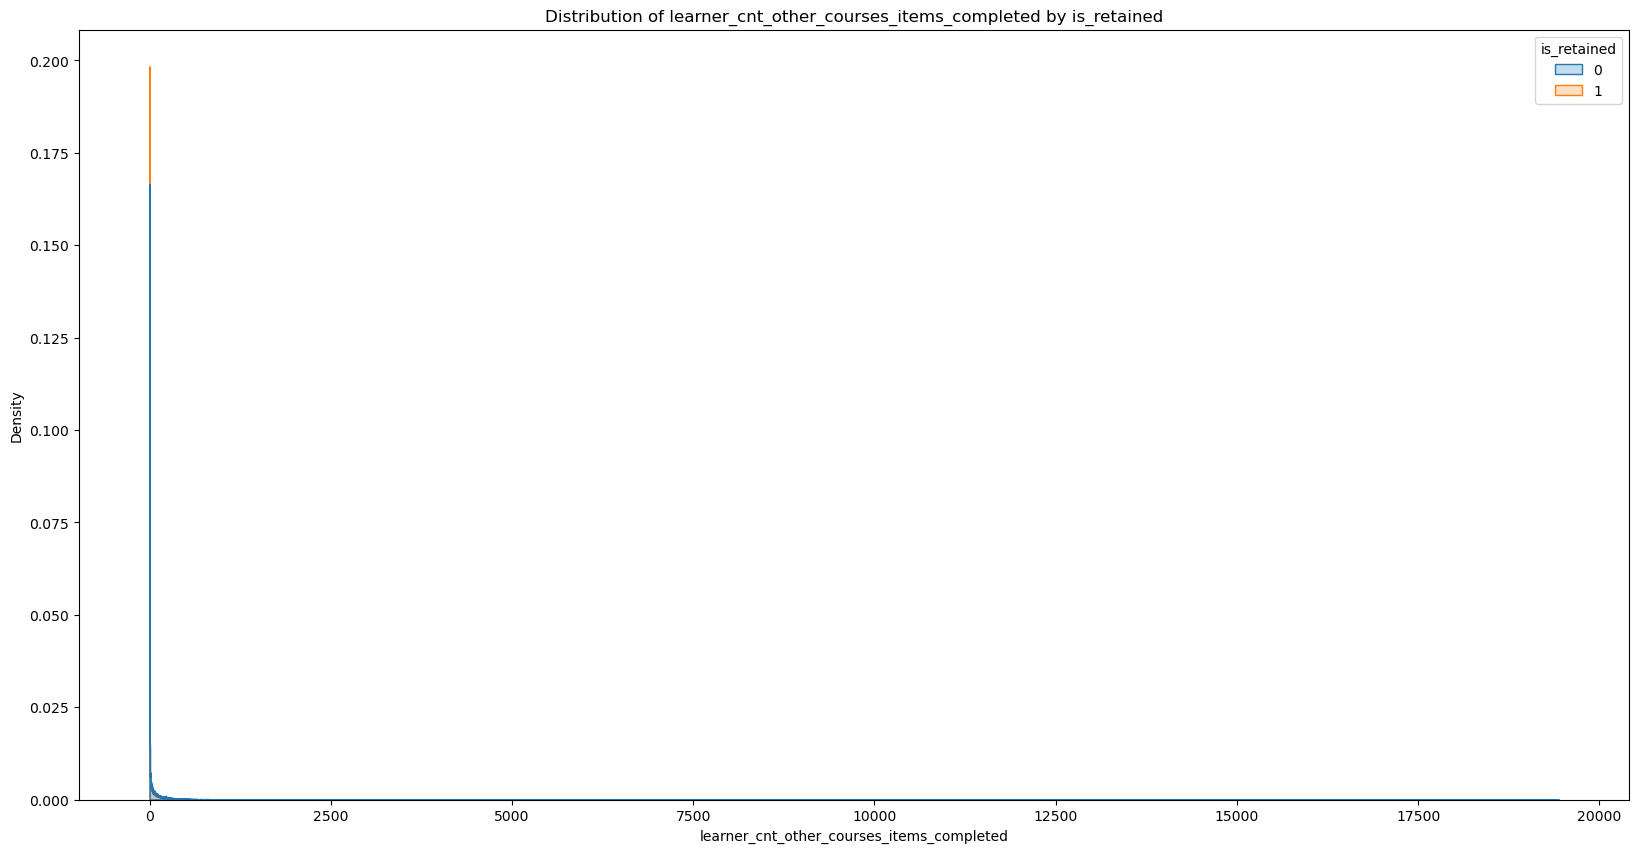

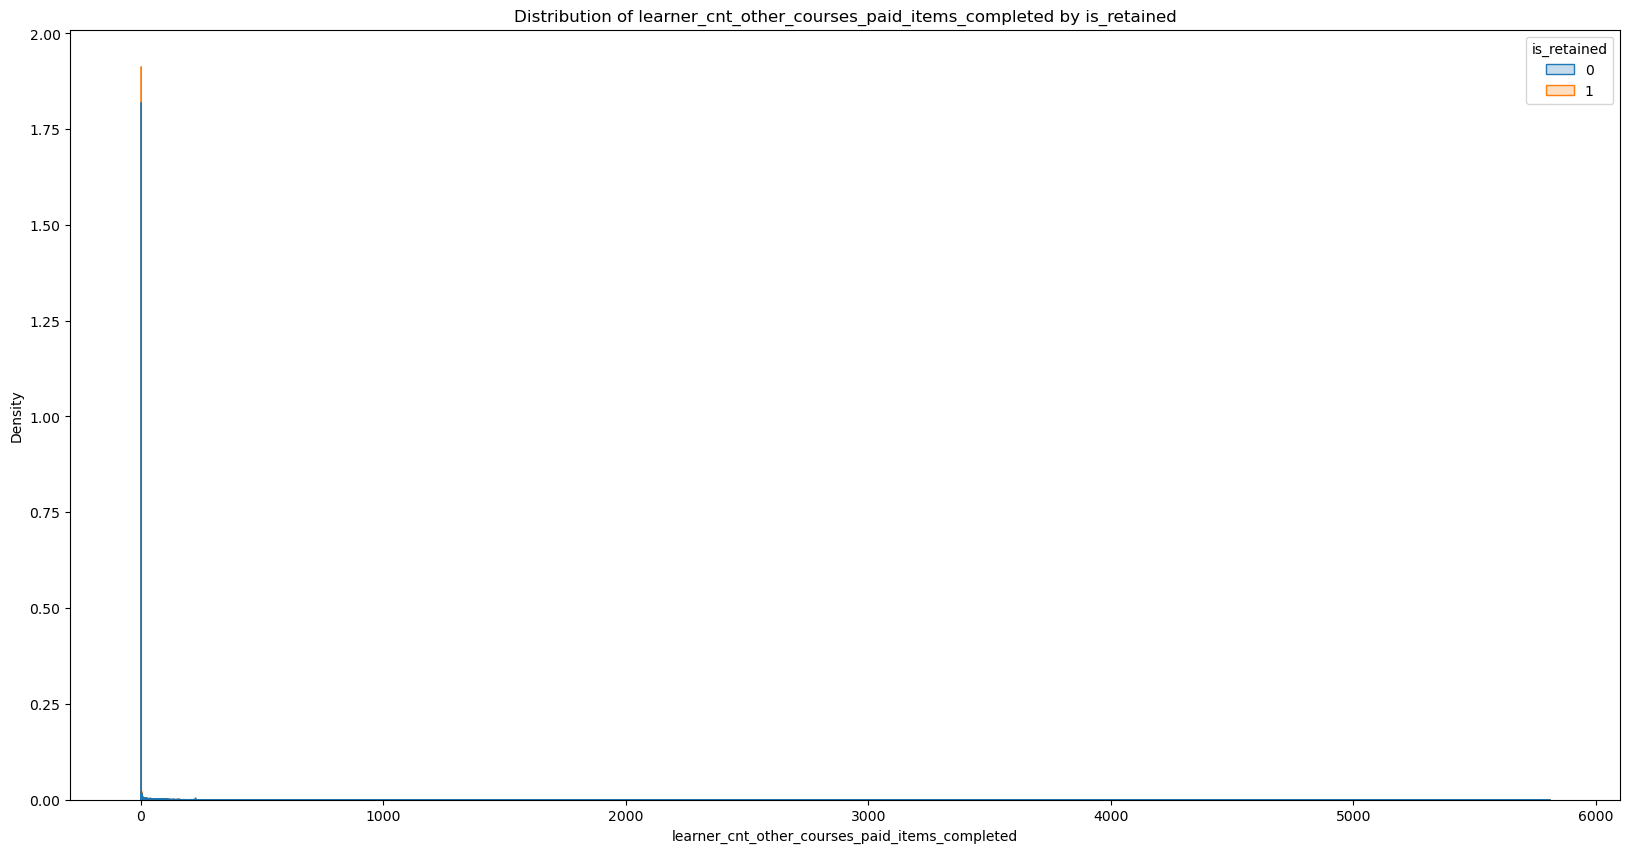

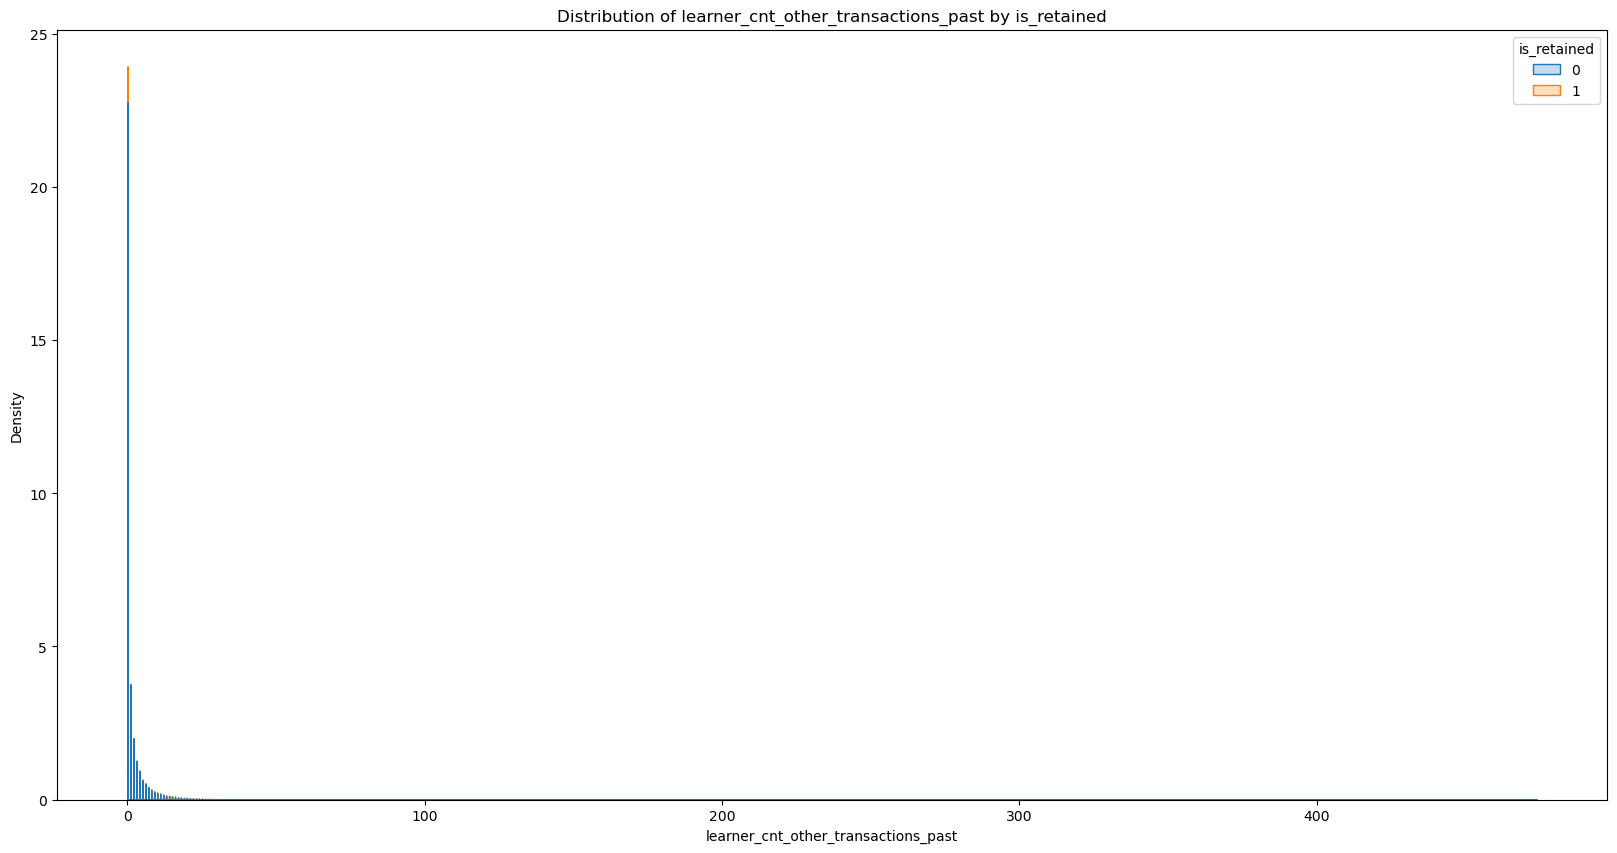

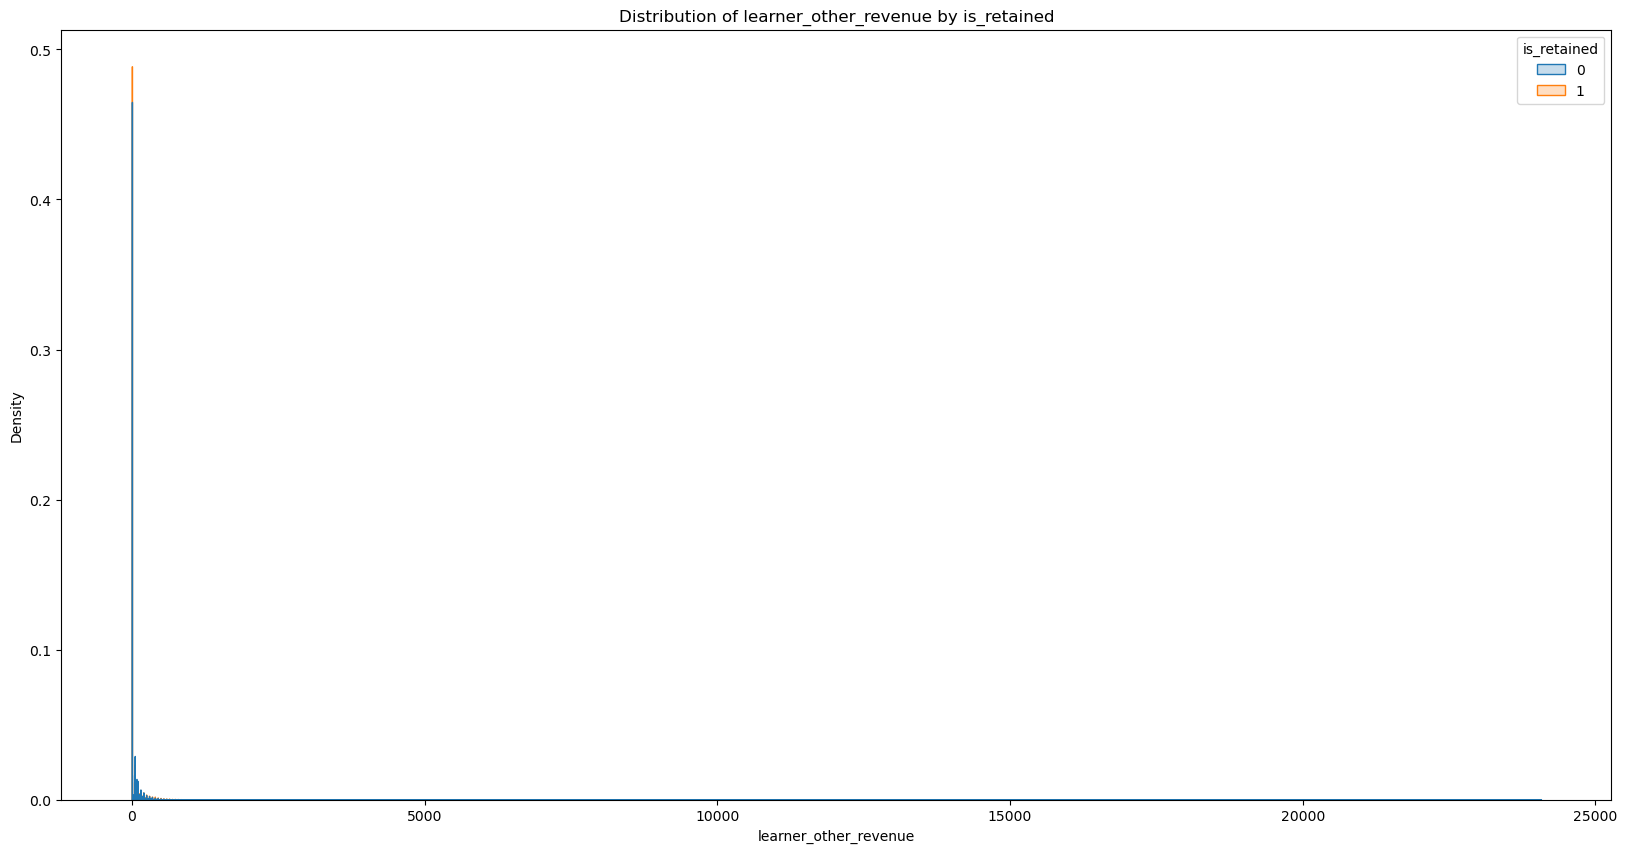

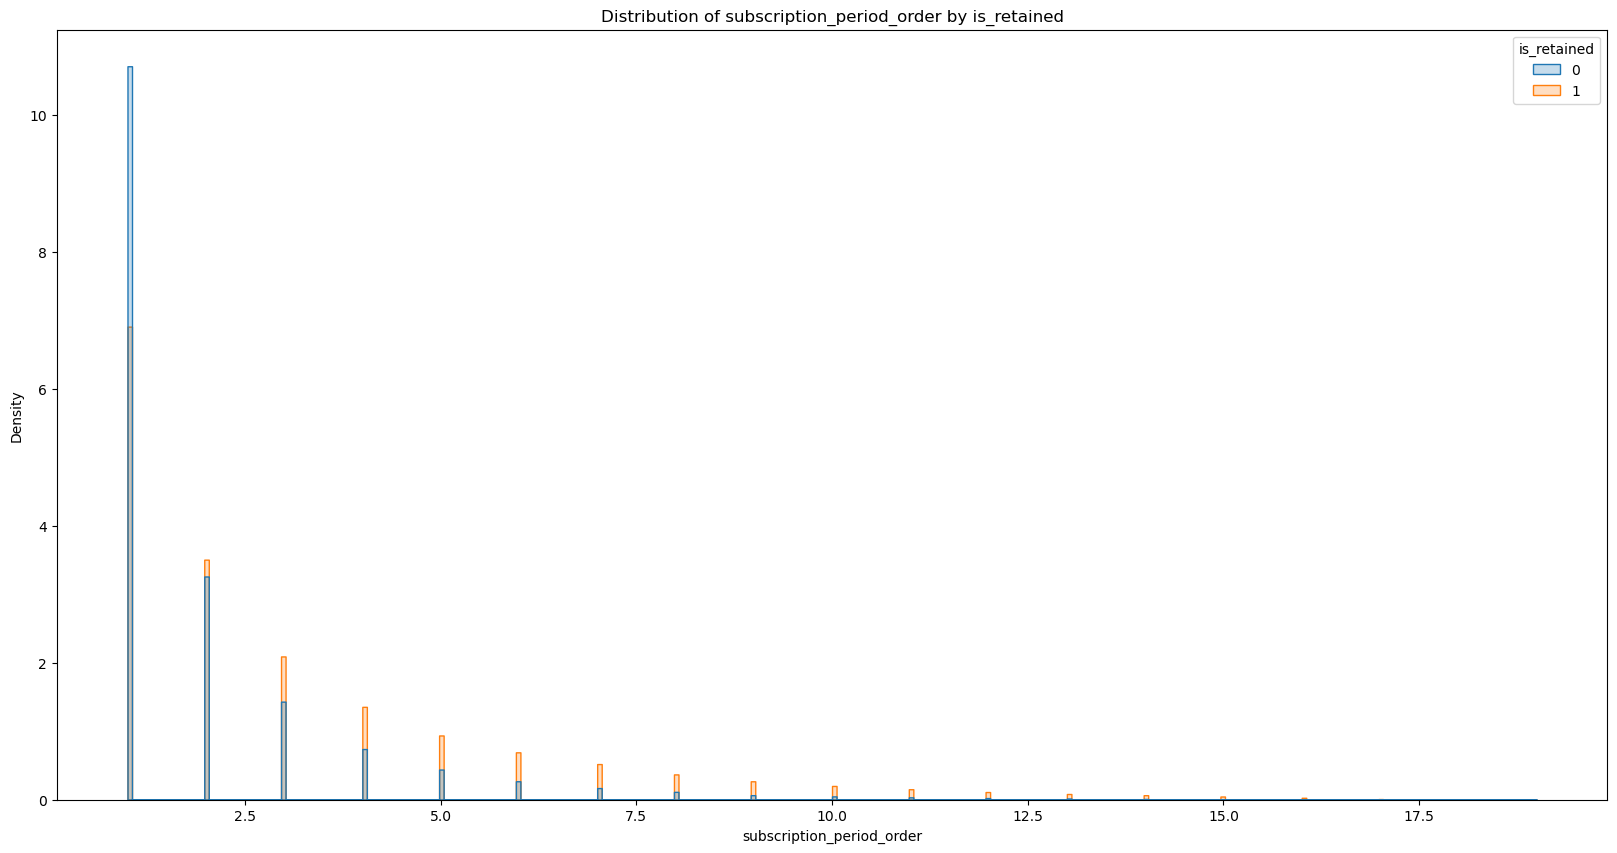

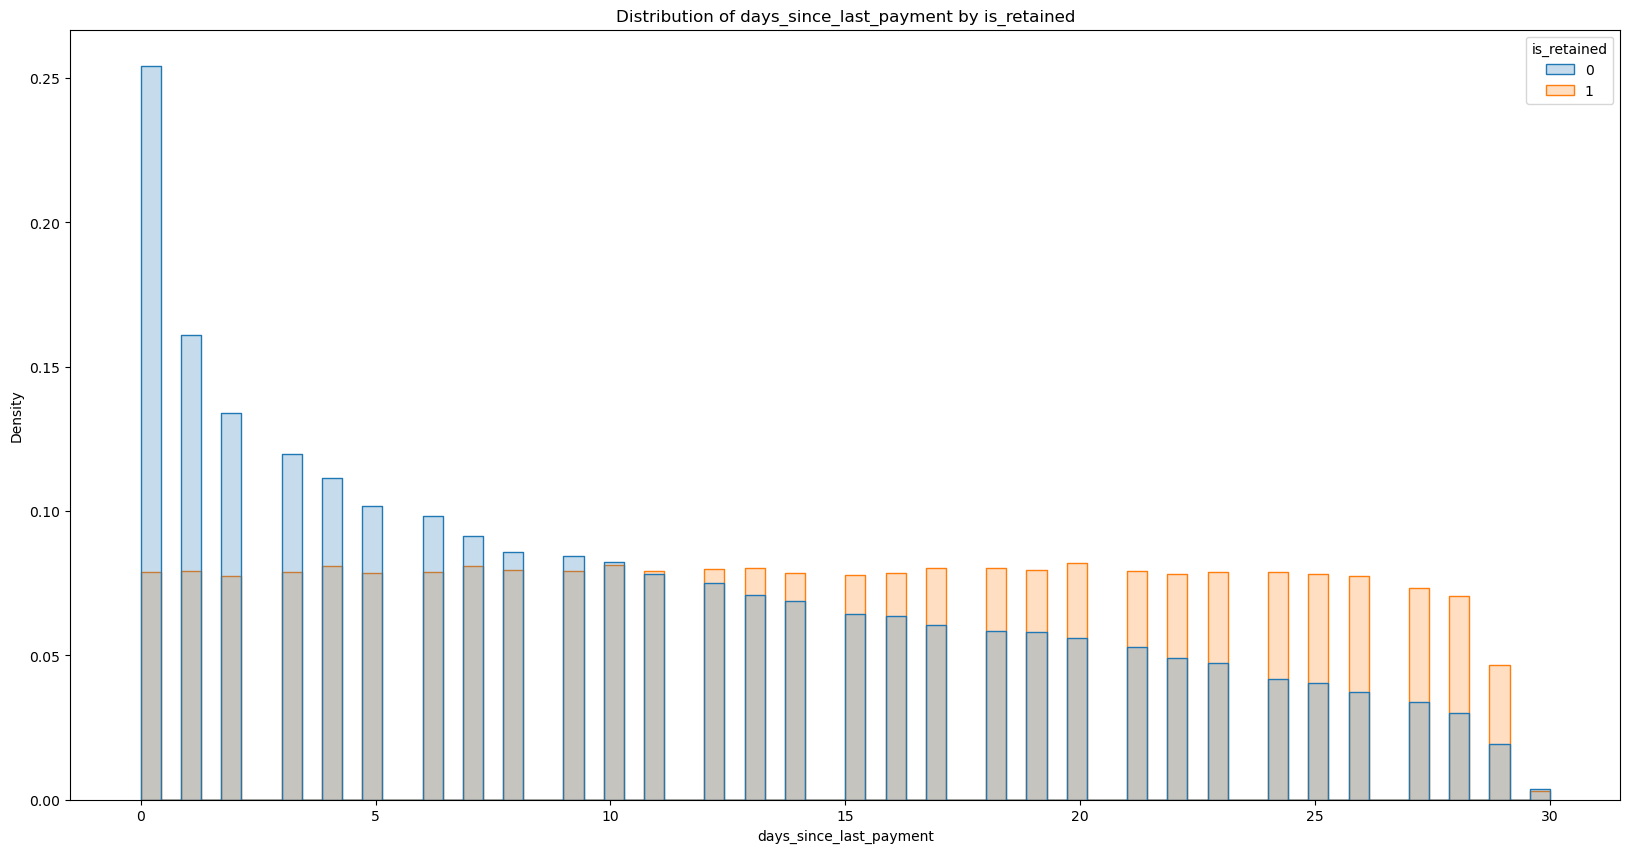

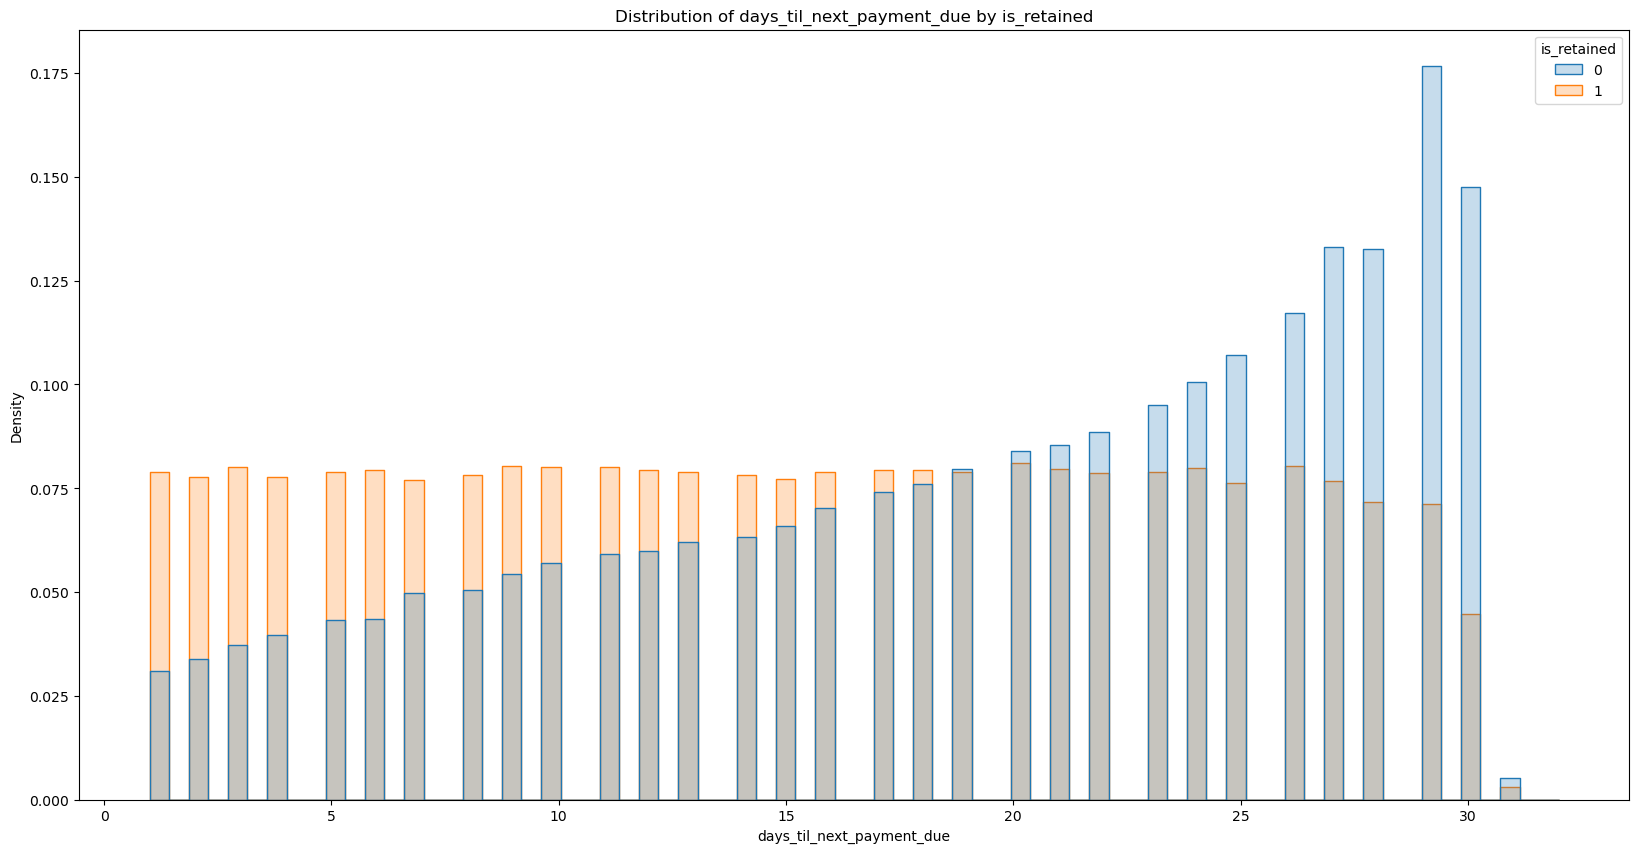

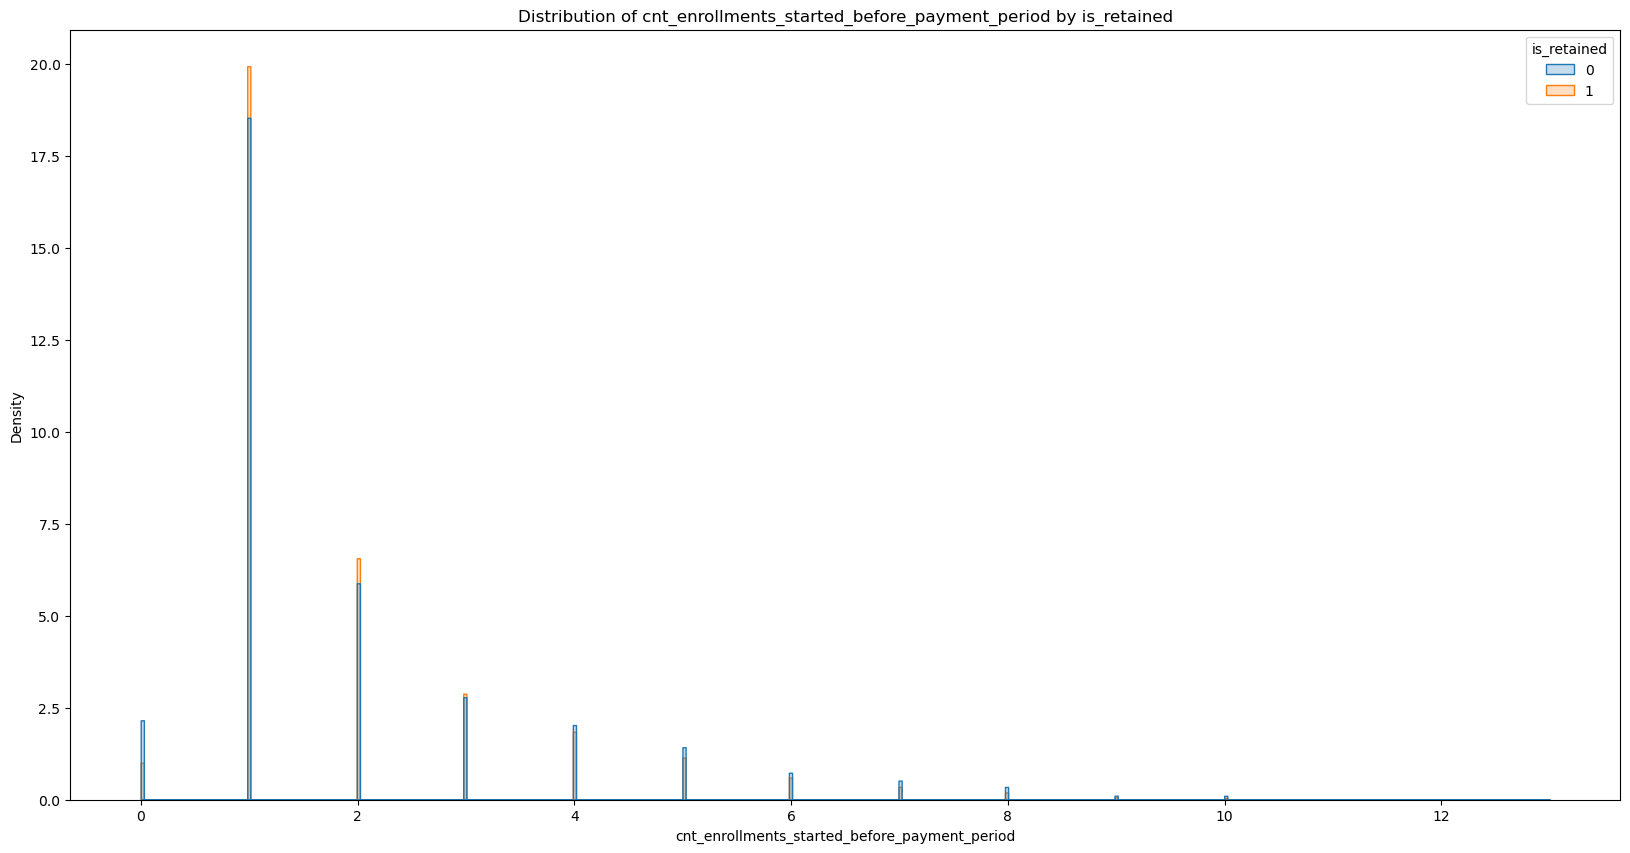

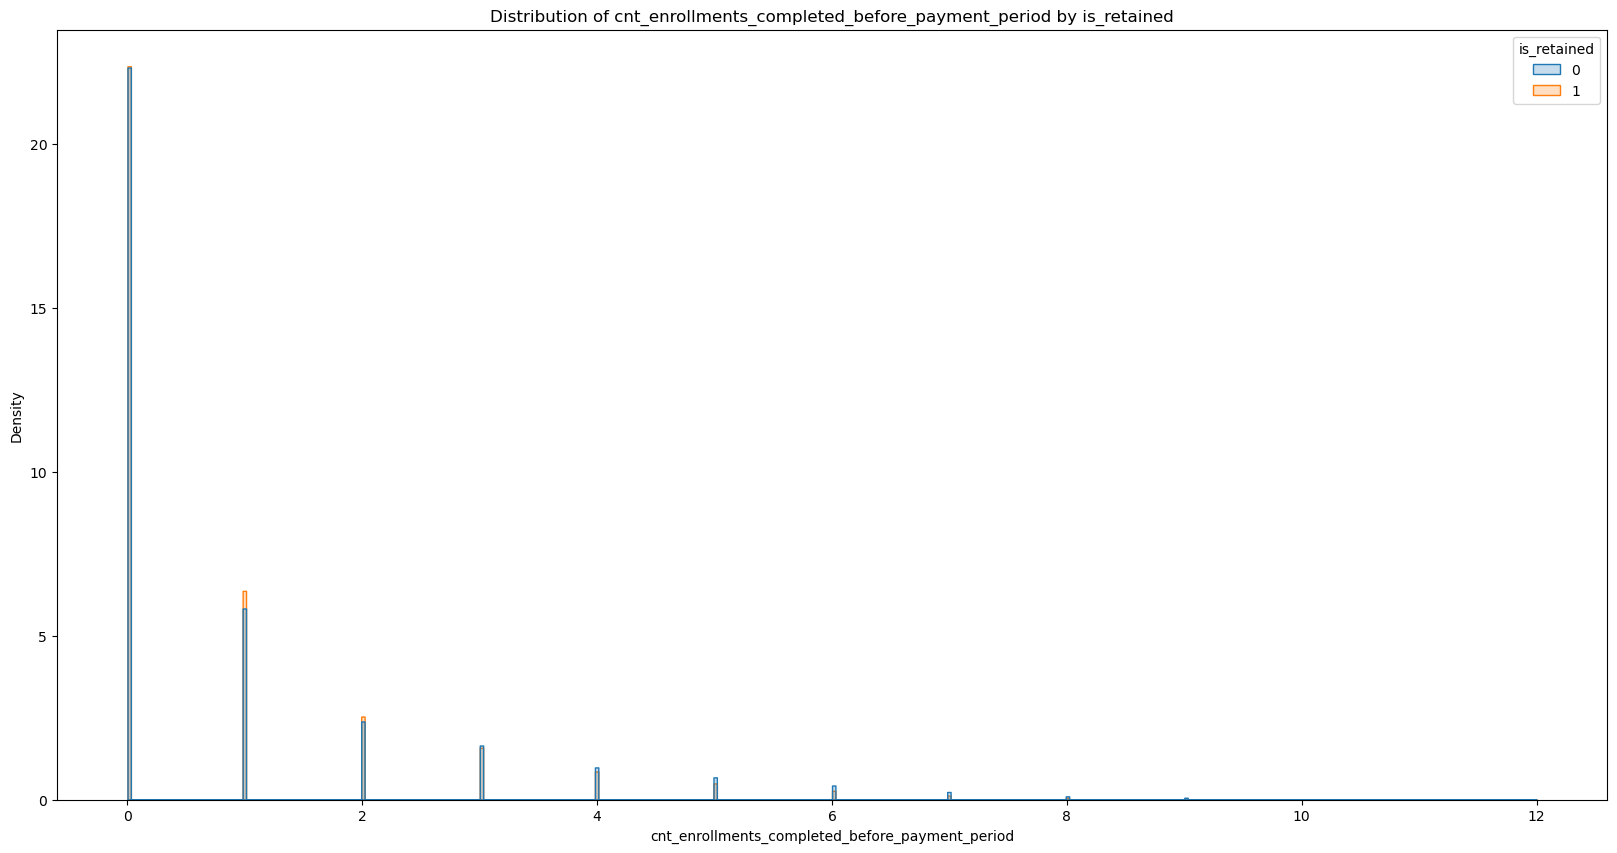

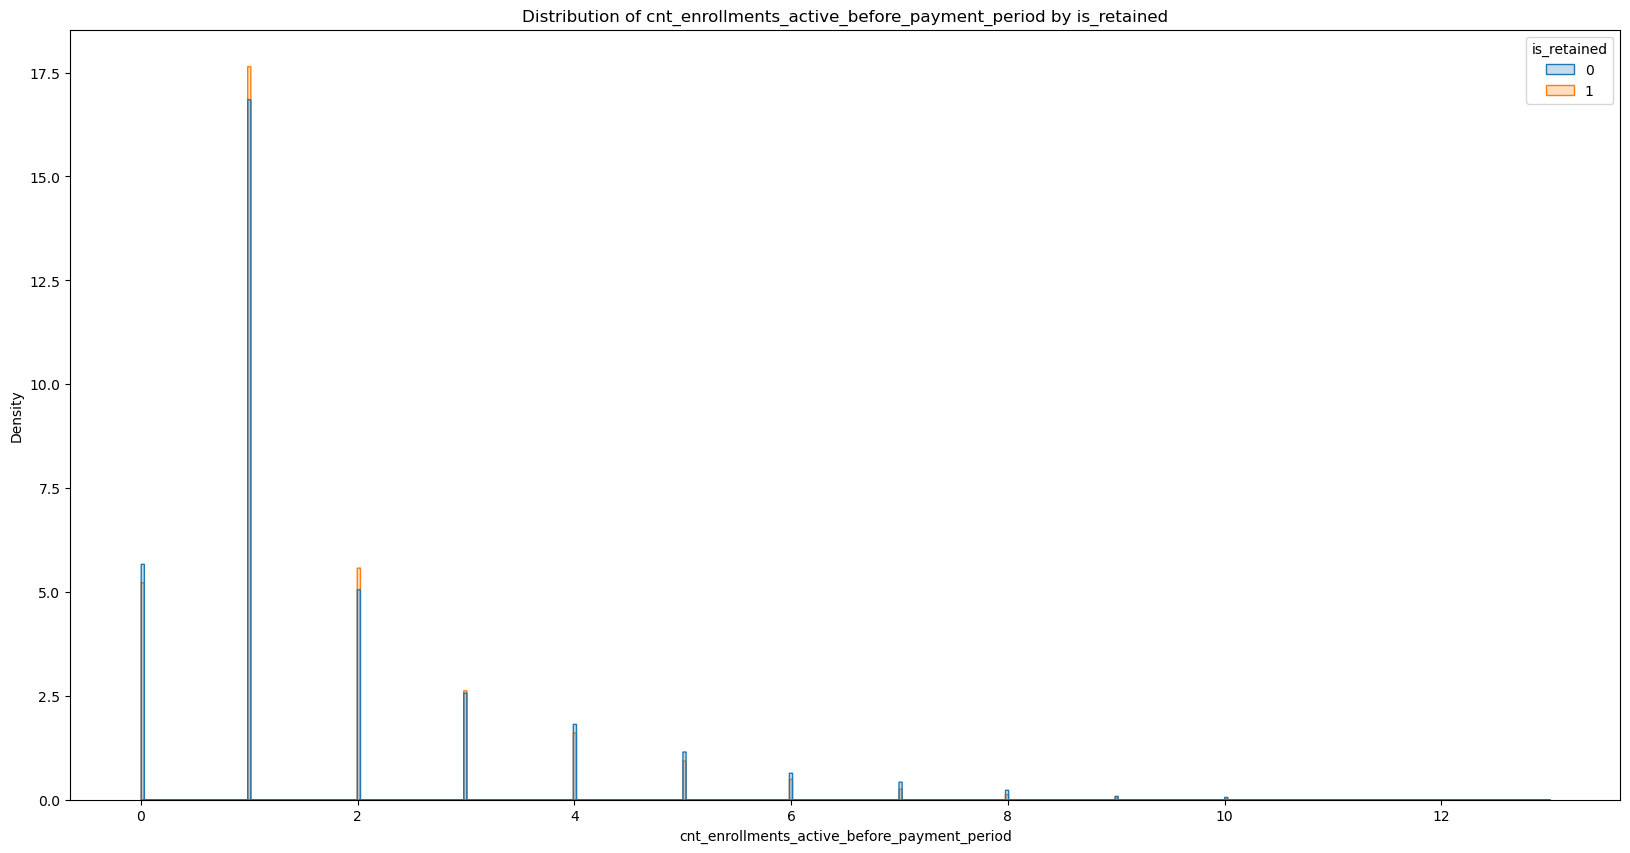

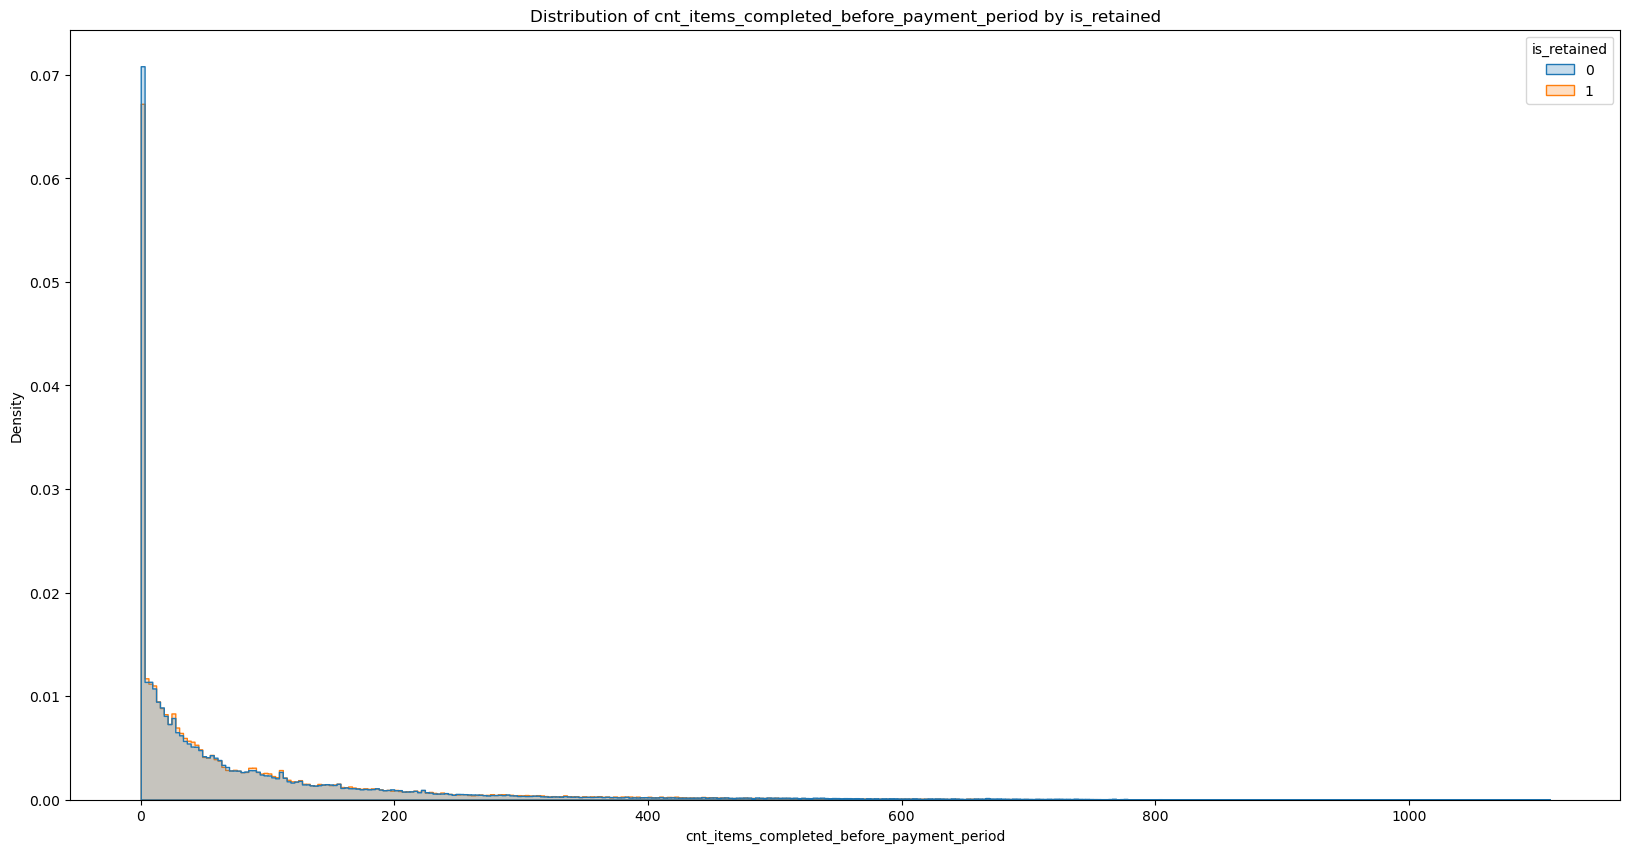

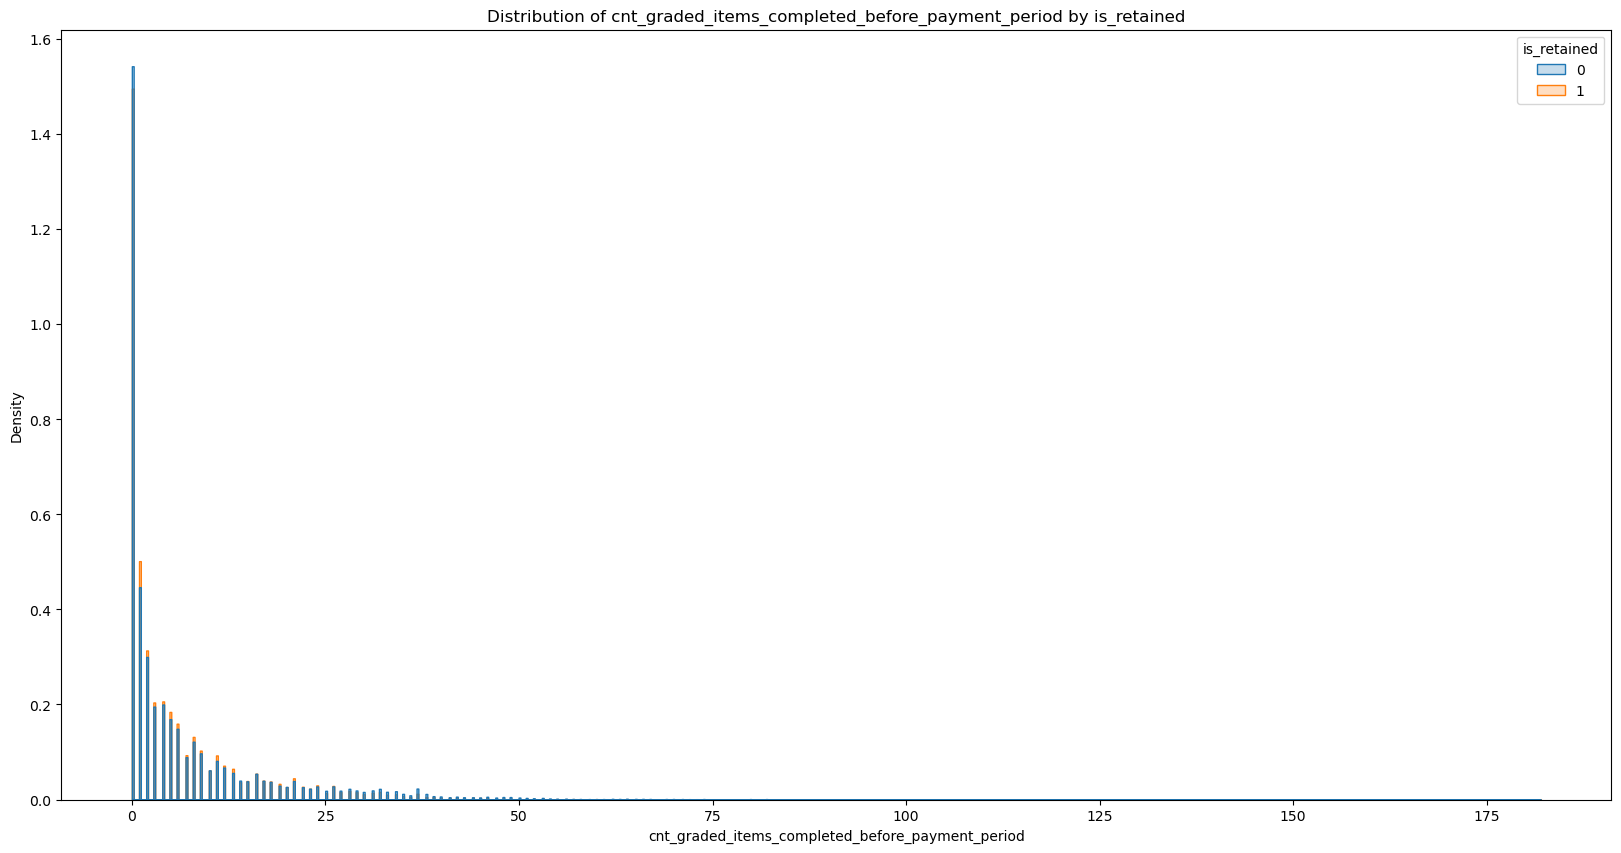

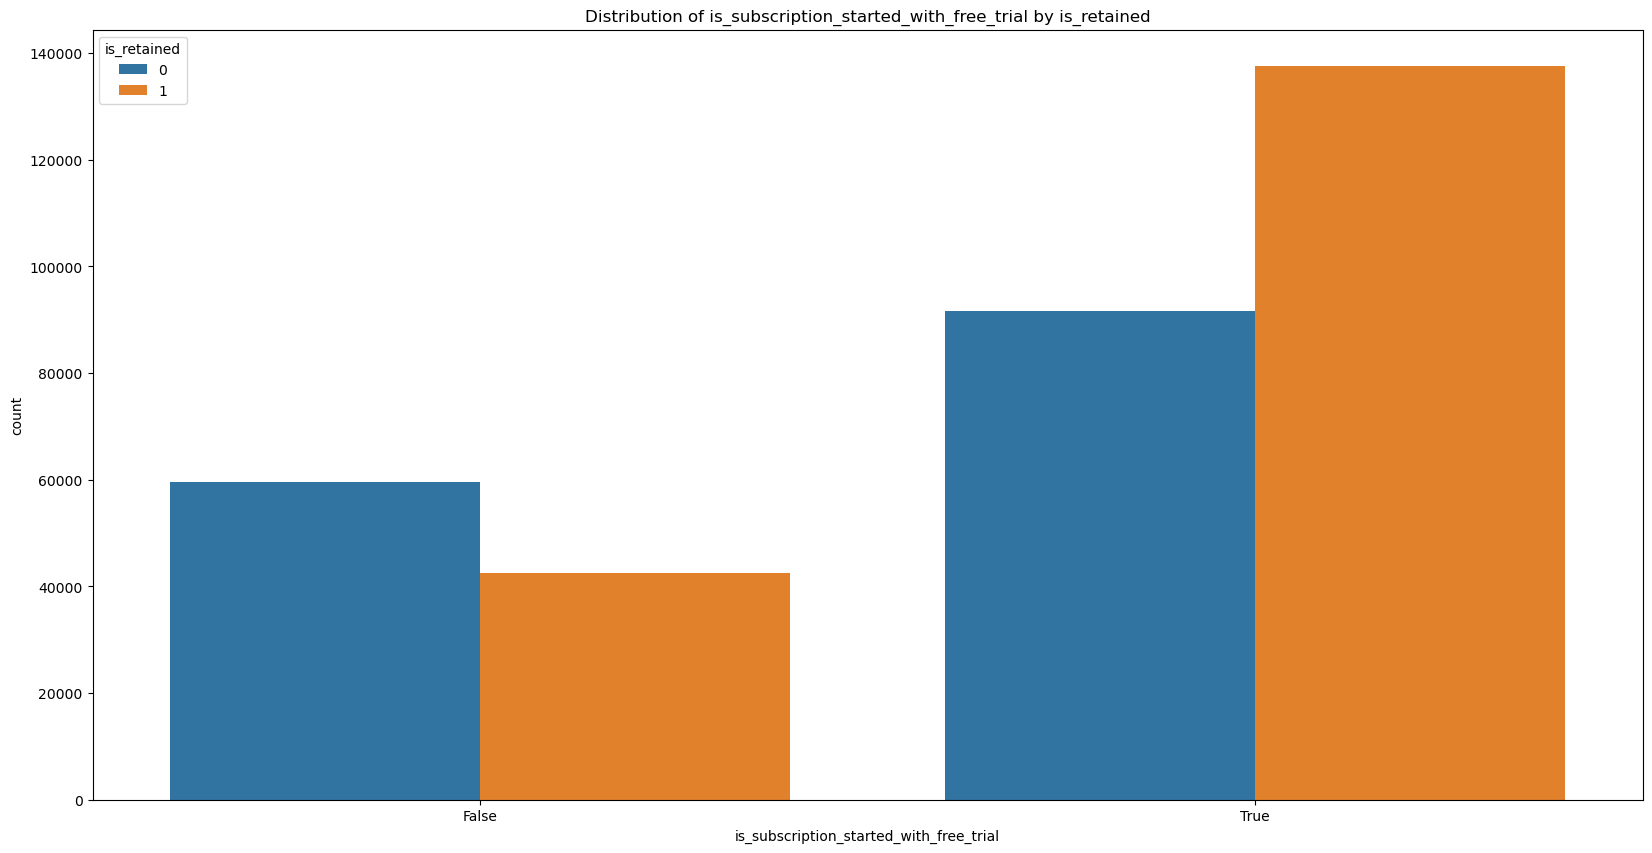

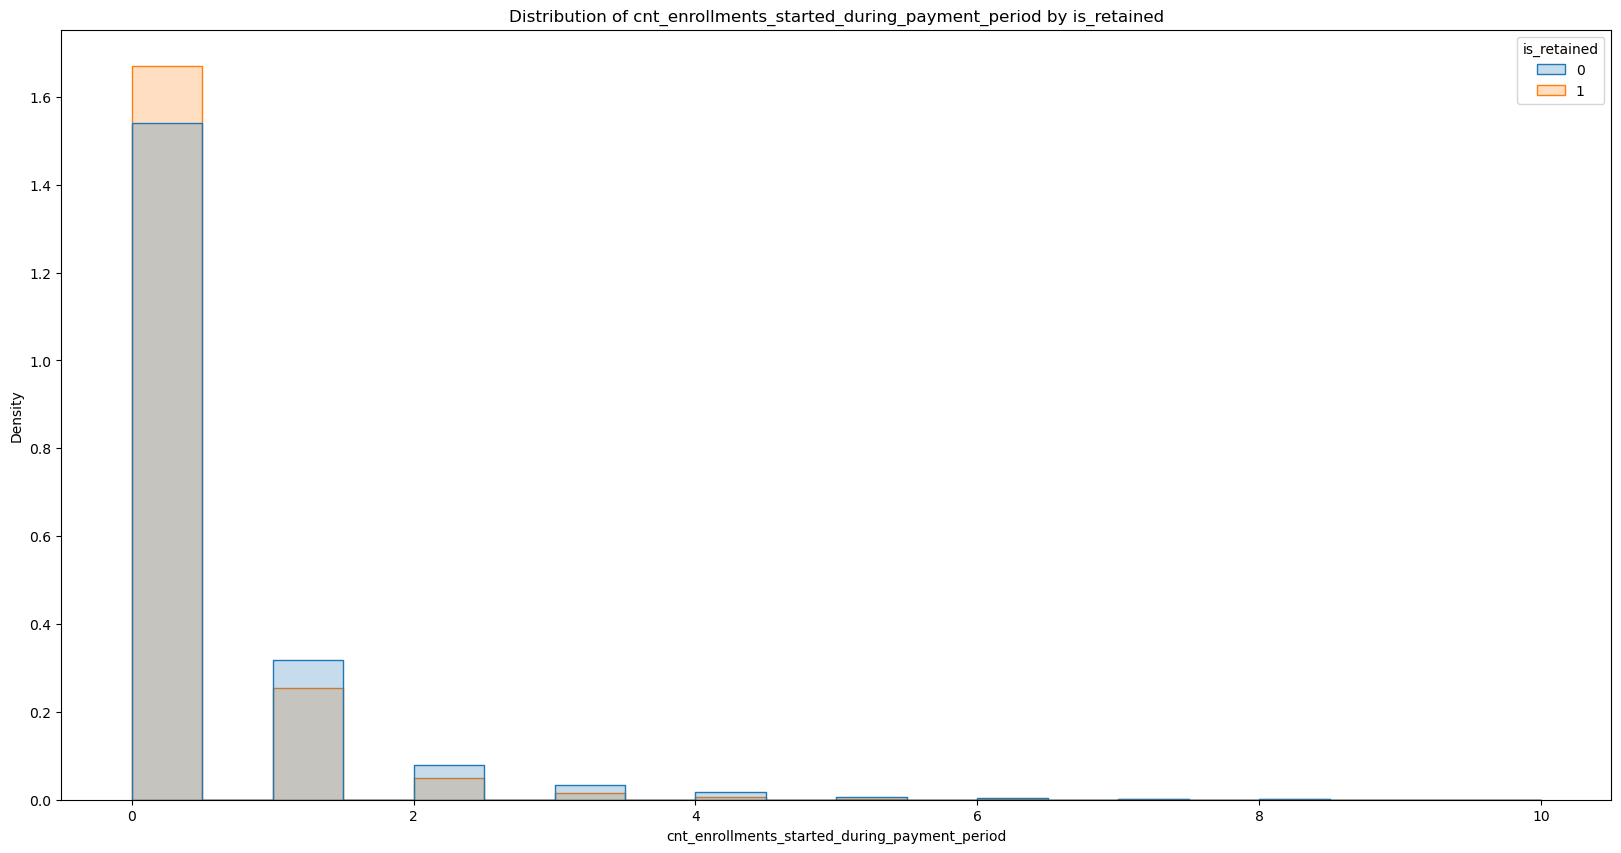

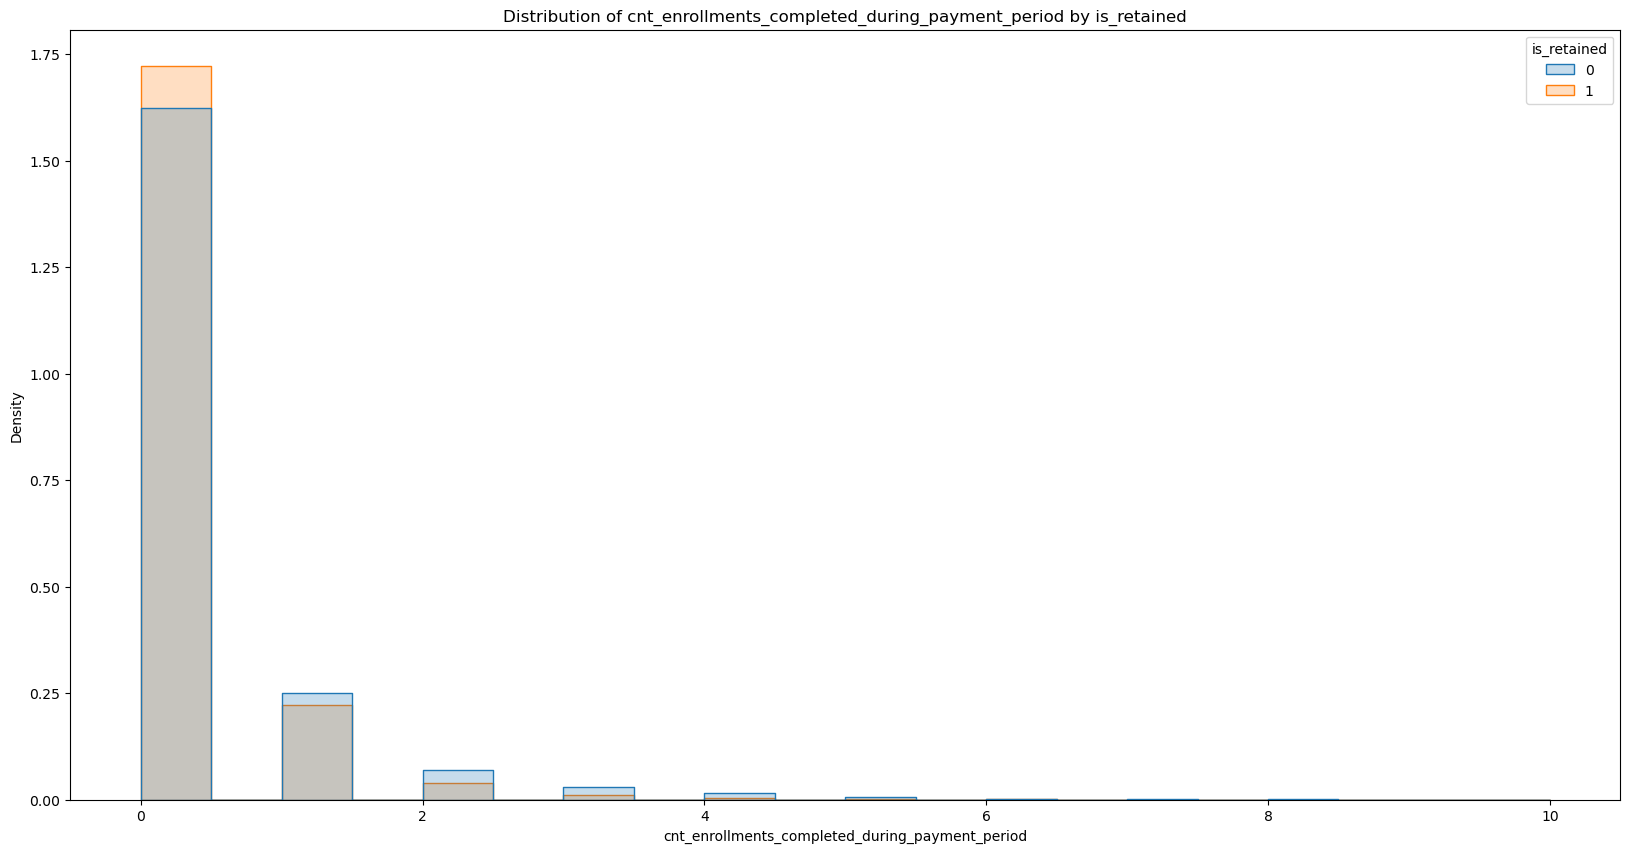

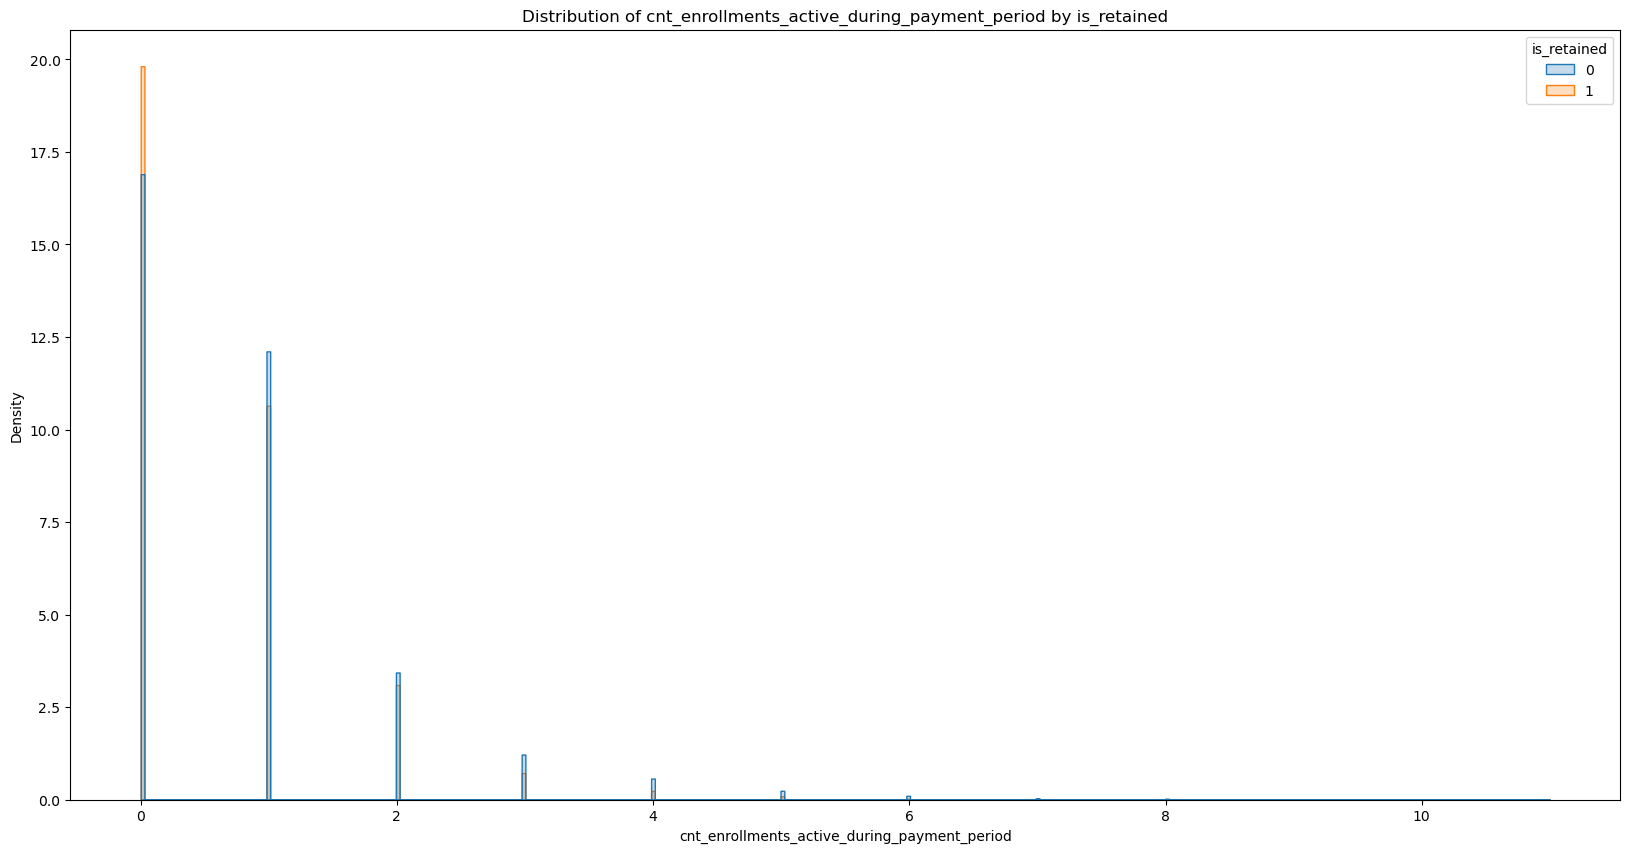

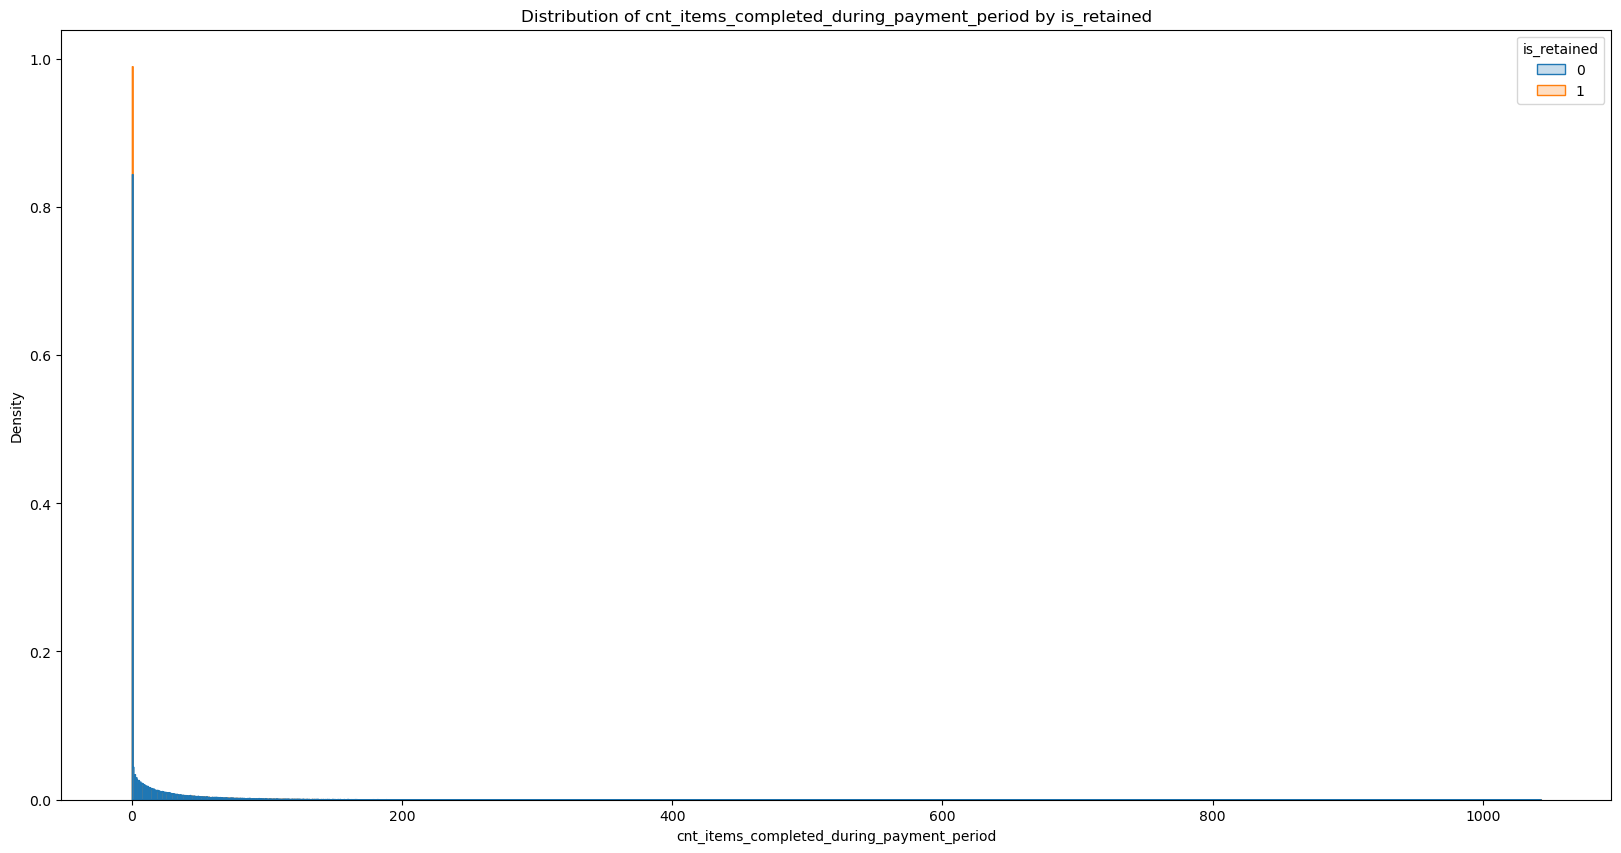

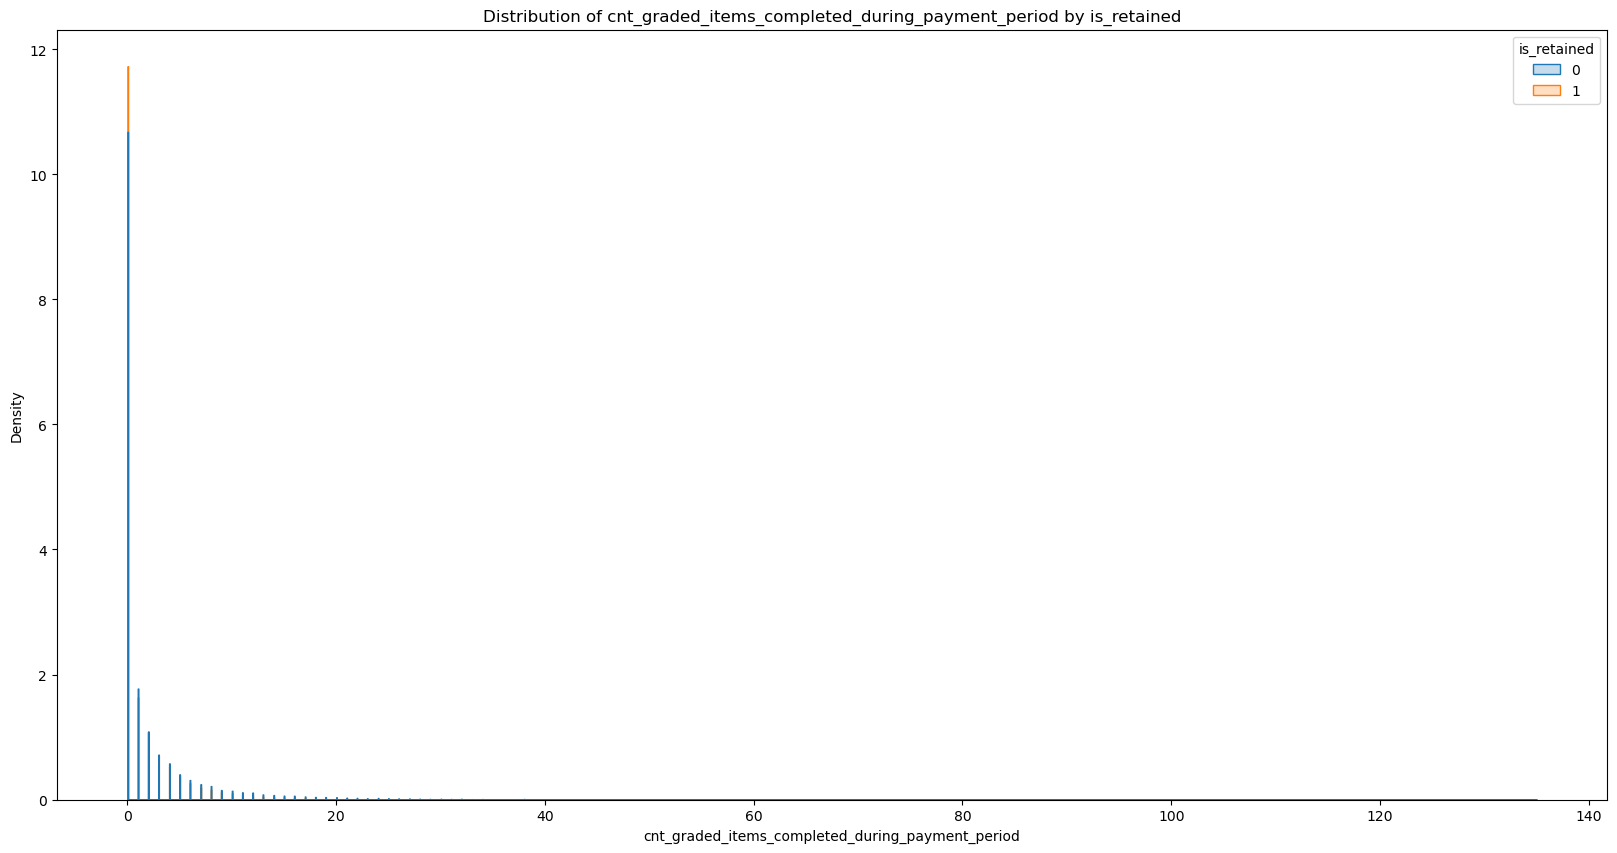

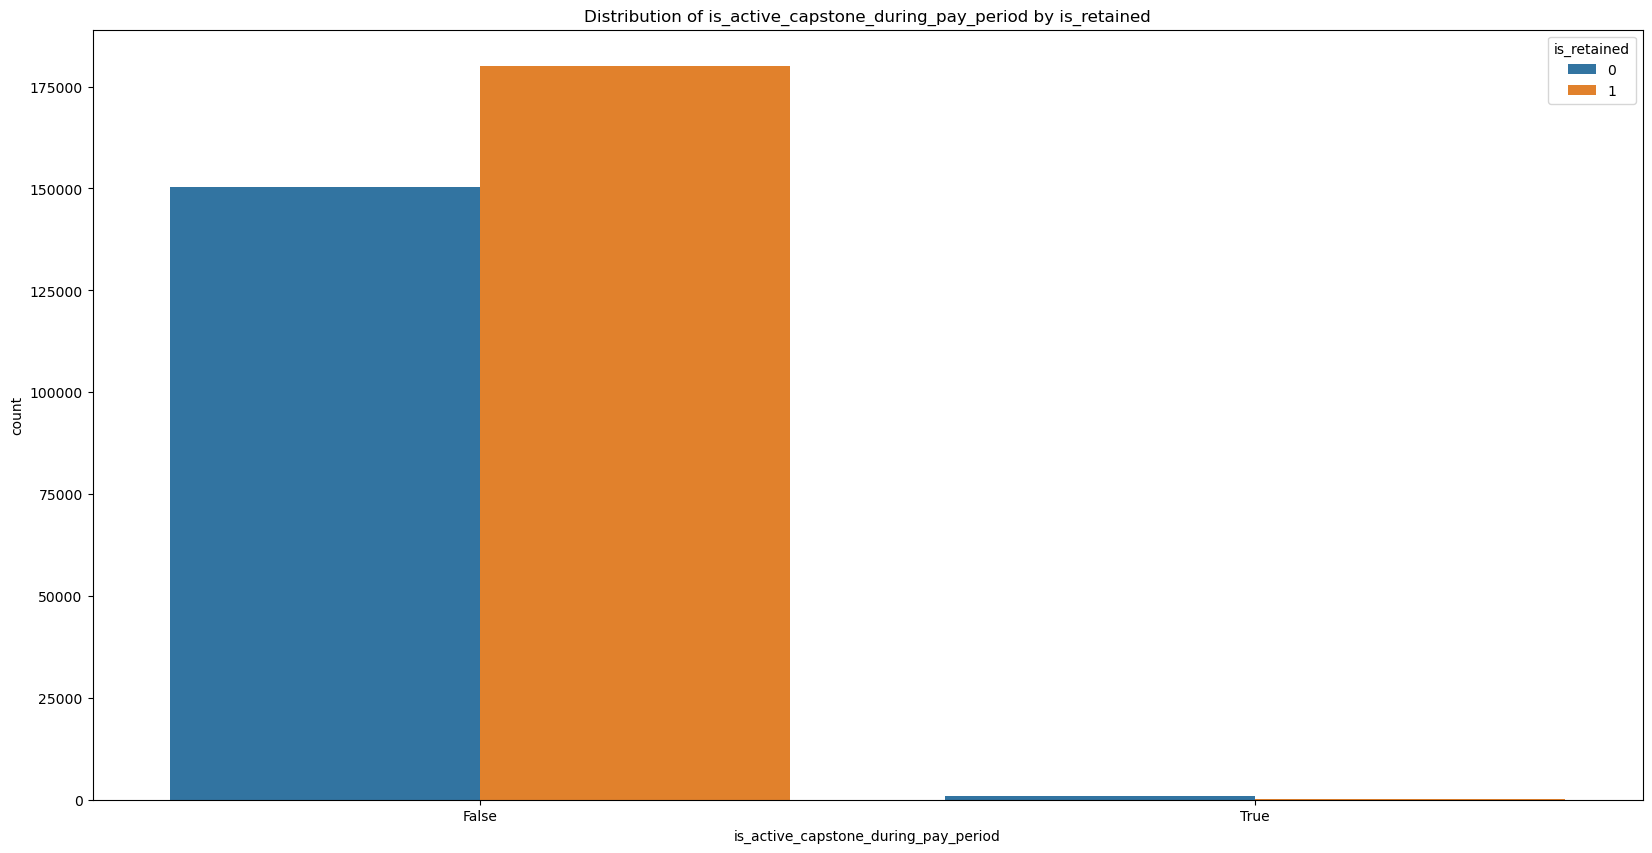

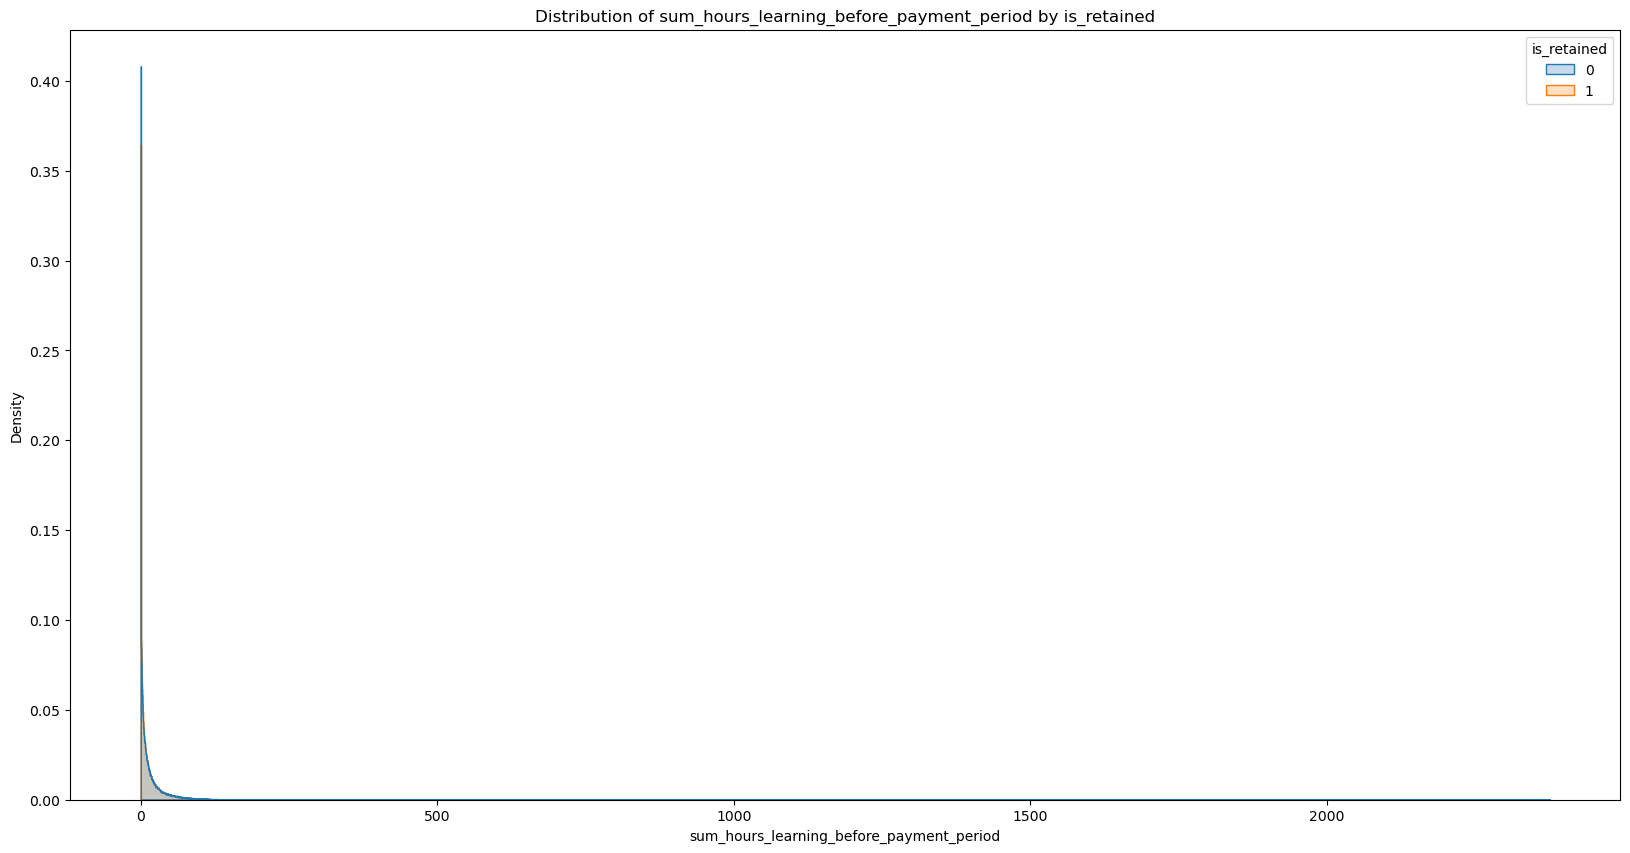

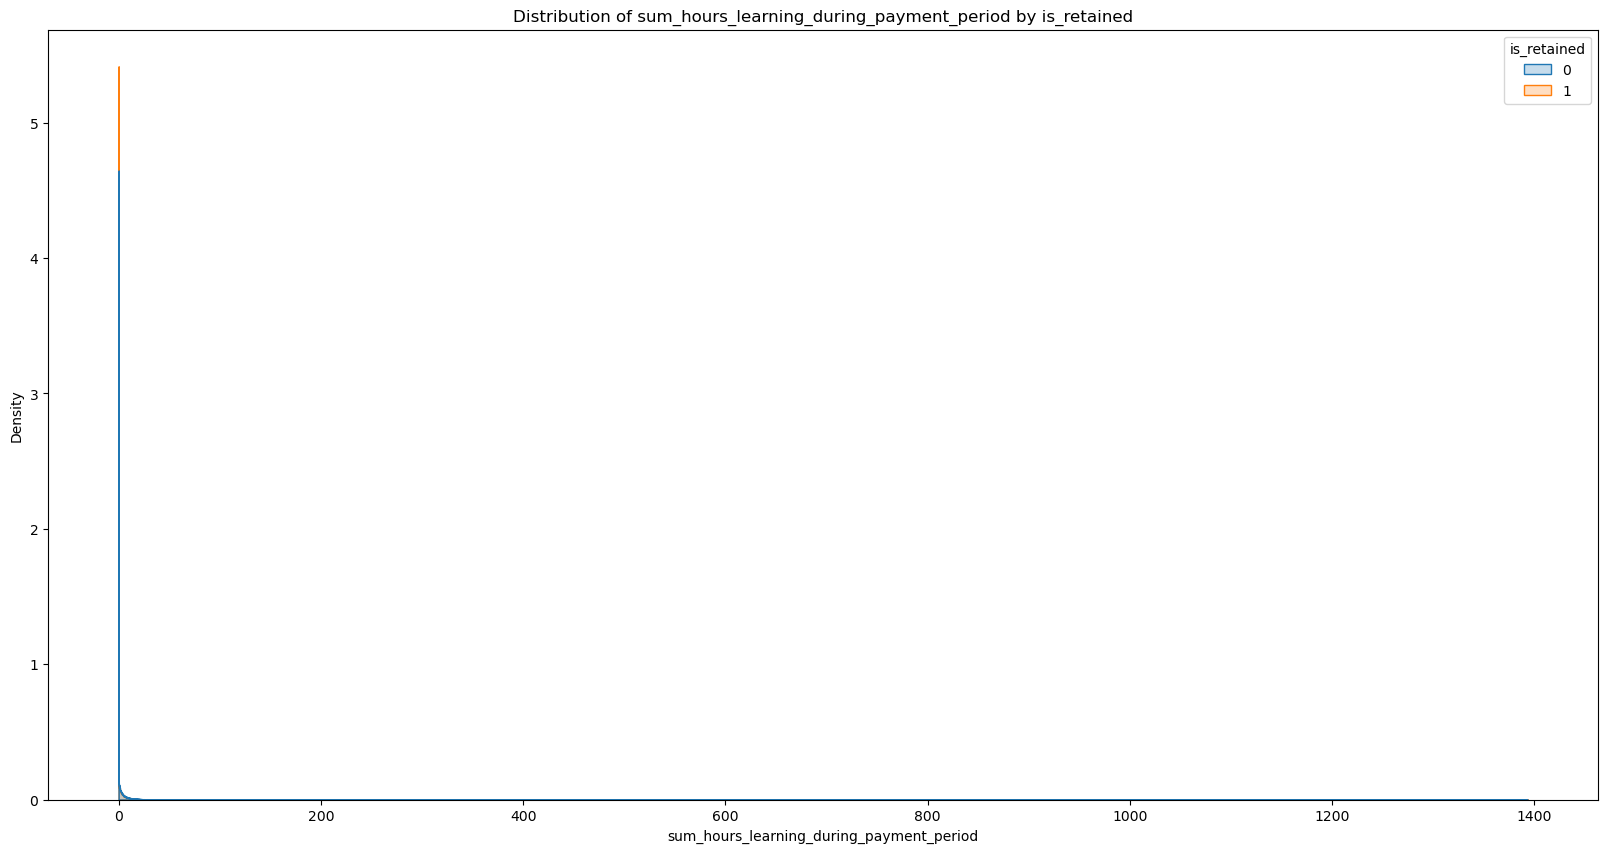

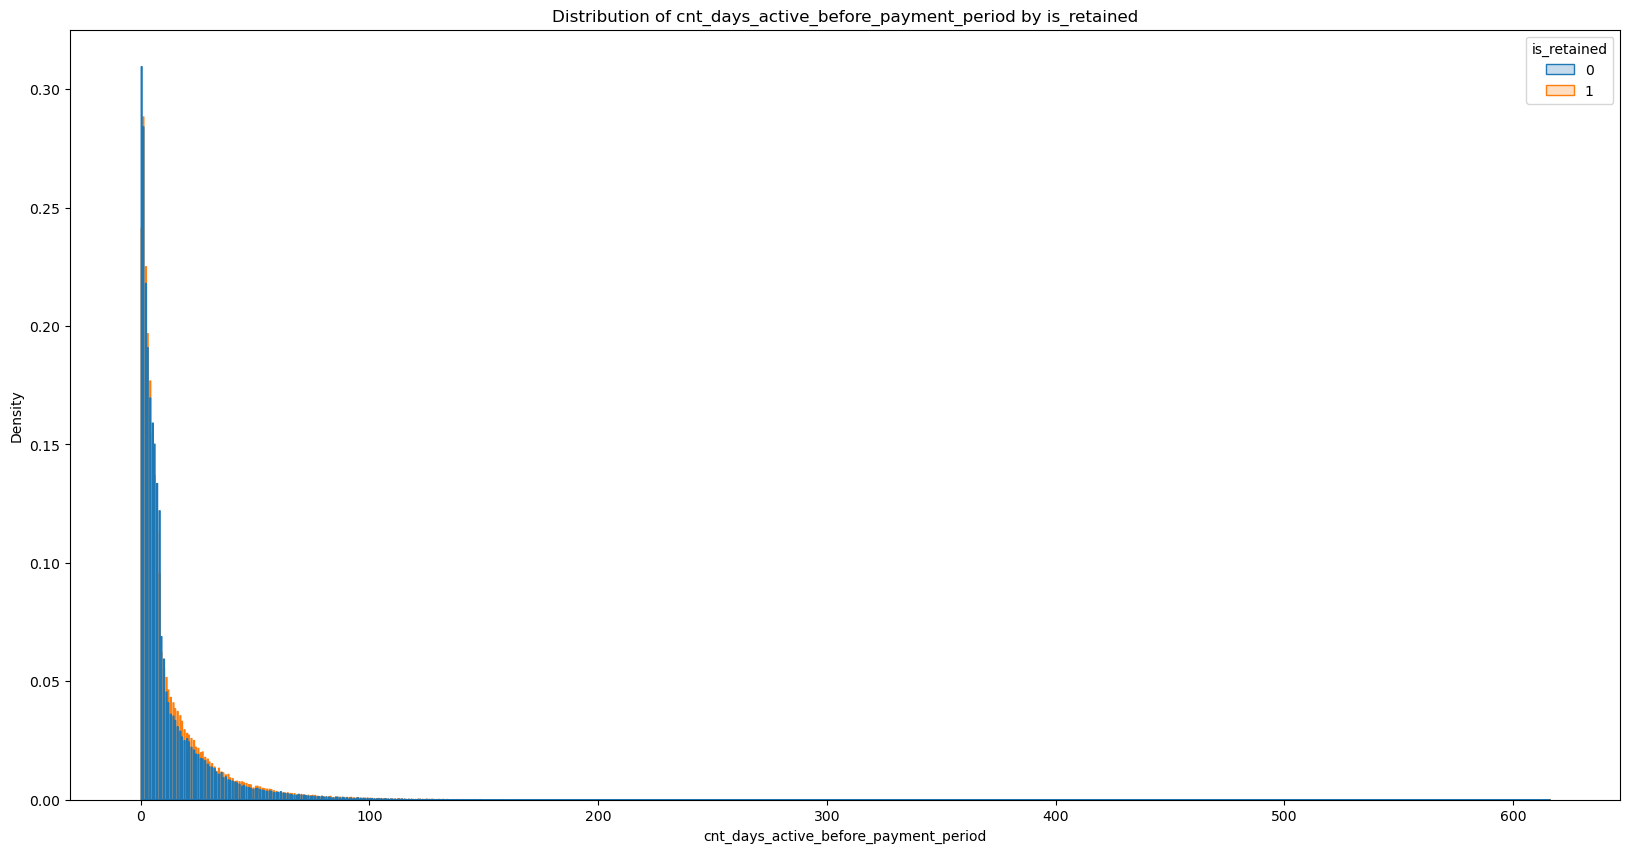

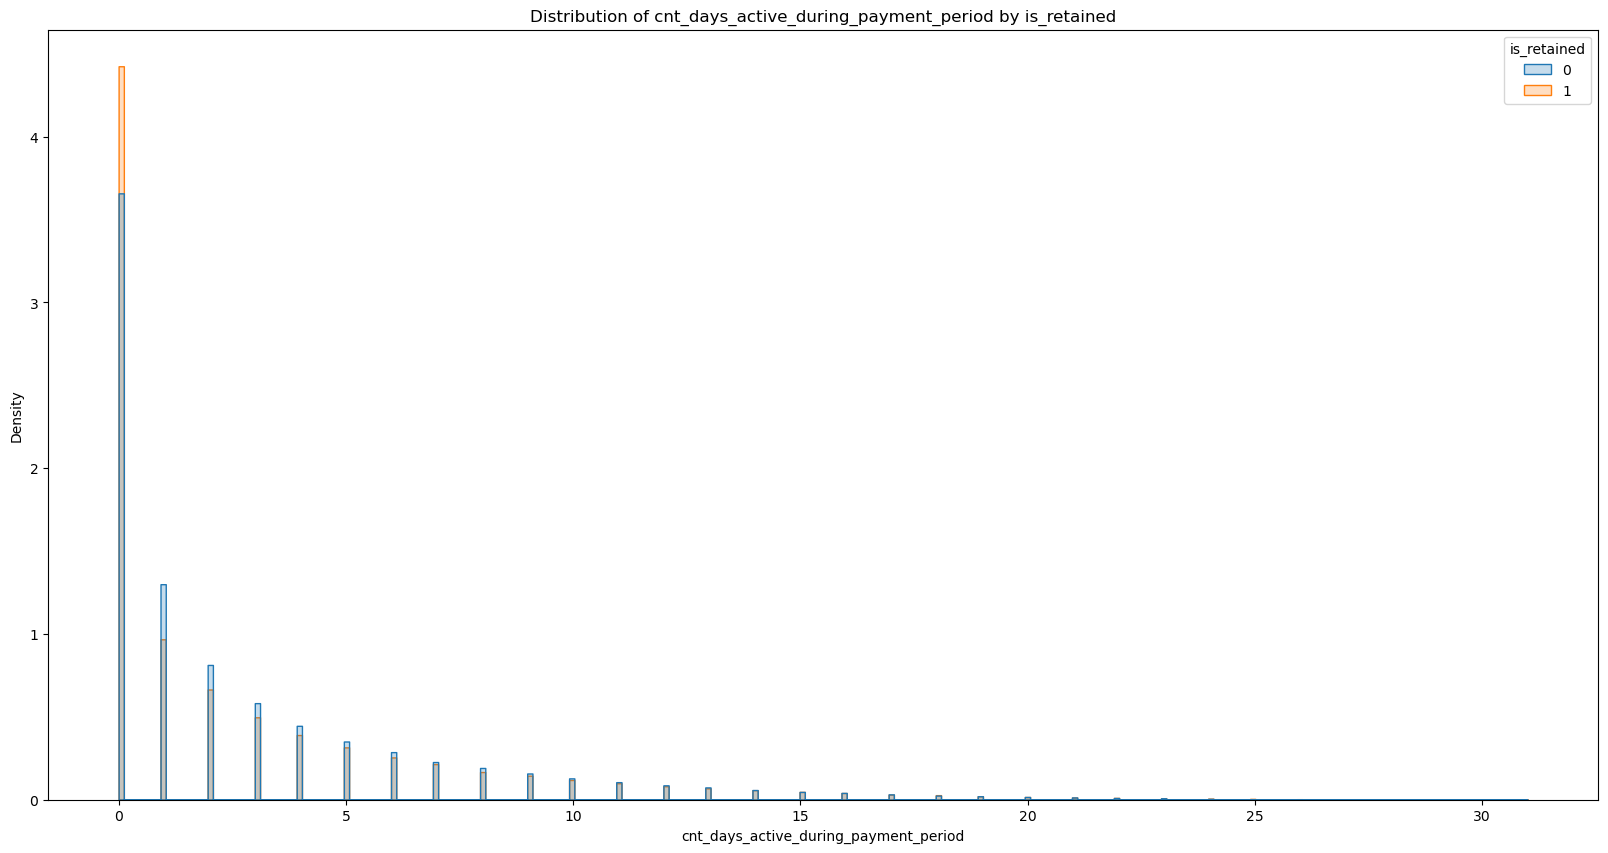

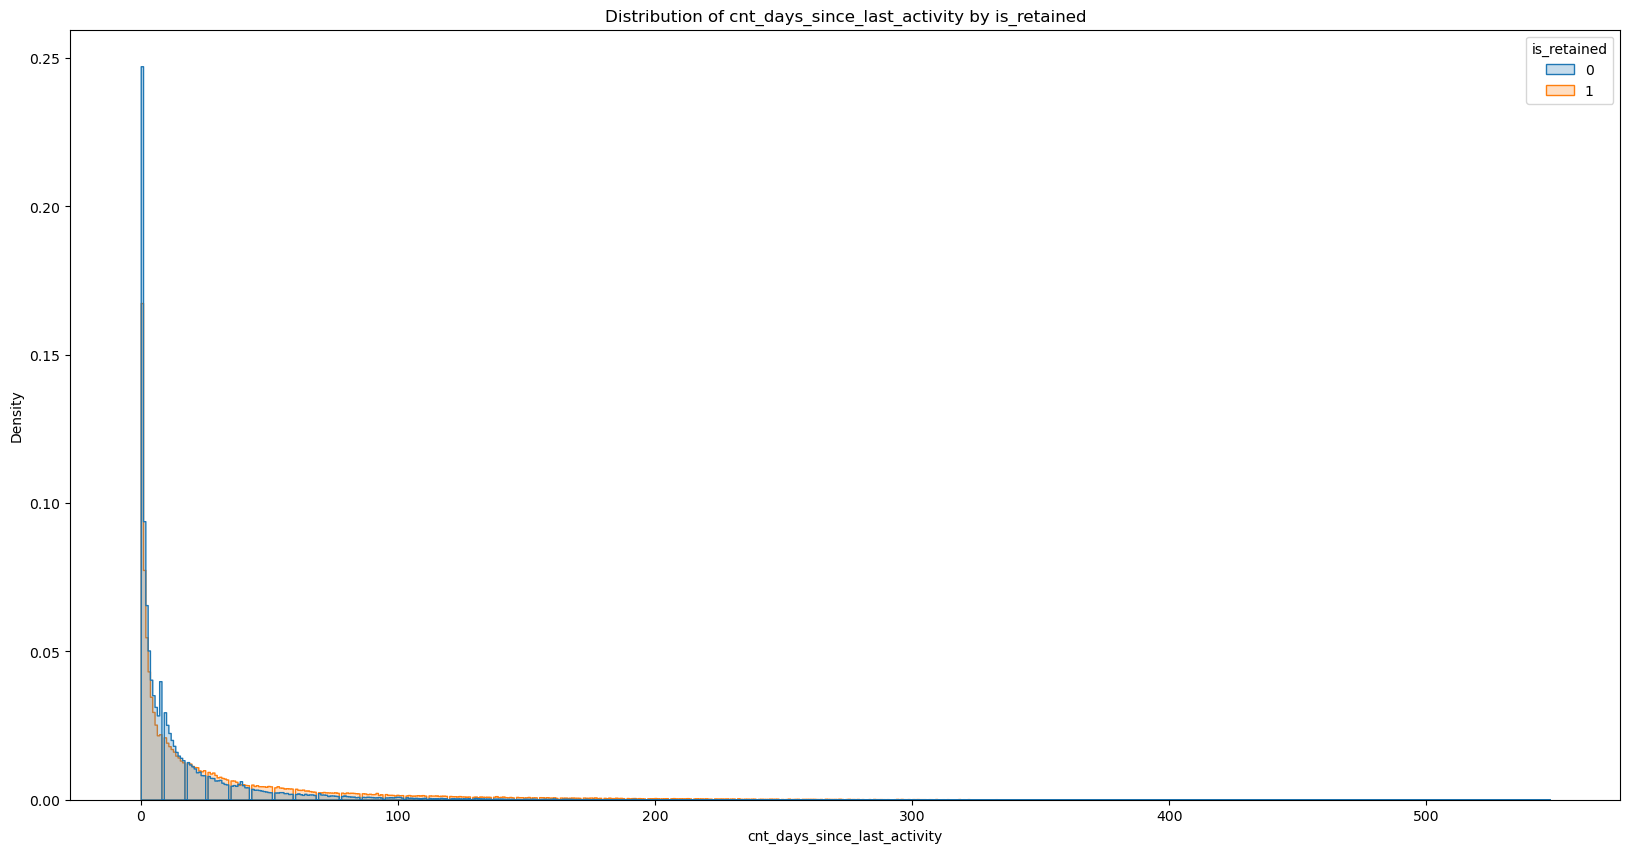

In [153]:
features = df.columns.drop('is_retained')  # Exclude the target column

for feature in features:
    plt.figure(figsize=(20, 10))
    
    # If the data type of the feature is numeric, plot a histogram
    if np.issubdtype(df[feature].dtype, np.number):
        sns.histplot(df, x=feature, hue='is_retained', element='step', stat='density', common_norm=False)
    # Otherwise, plot a count plot for categorical data
    else:
        sns.countplot(data=df, x=feature, hue='is_retained')
    
    plt.title(f'Distribution of {feature} by is_retained')
    plt.show()


## **Data Preprocessing⛏**

In [154]:
# Exclude 'id' and 'target_label' from the list of numerical columns to scale
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['ID', 'is_retained']).tolist()
categorical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()


In [155]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [183]:
from sklearn.preprocessing import LabelEncoder

# Split the data
X = df.drop('is_retained', axis=1)
y = df['is_retained']
# Split data into training and validation sets
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into sub-training and sub-validation sets
X_train, X_sub_val, y_train, y_sub_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
# Create a dictionary to store the label encoders for each column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_full[col] = le.fit_transform(X_train_full[col].astype(str))
    label_encoders[col] = le
for col in categorical_cols:
    le = label_encoders[col]
    
    X_train[col] = le.transform(X_train[col].astype(str))
    X_sub_val[col] = le.transform(X_sub_val[col].astype(str))
    X_val[col] = le.transform(X_val[col].astype(str))


smote = SMOTE(random_state=42)
X_train_Full, y_train_Full = smote.fit_resample(X_train_full, y_train_full)


In [187]:
X_train

,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
119955,0.041534,2,0,0,-0.380291,10,0,-0.320015,-0.342155,-0.367302,...,1.166792,0.334599,-0.180226,0.057430,0,1.293458,-0.019511,2.562271,1.329980,-0.460411
134564,0.041534,1,1,1,-0.625335,3,0,-0.392467,-0.342155,-0.377197,...,-0.359022,-0.718655,-0.418786,-0.395306,0,0.288588,-0.411162,0.080327,-0.637108,0.495567
270563,0.041534,1,1,1,-0.722091,14,0,-0.392467,-0.342155,-0.377197,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.569257,-0.411162,-0.606169,-0.637108,0.572045
293038,0.041534,1,0,0,-0.655834,14,3,0.187147,0.458223,0.506784,...,-0.359022,-0.718655,-0.418786,-0.395306,0,0.095998,-0.411162,0.133134,-0.637108,-0.364813
231033,-0.526973,4,0,0,2.159543,1,0,1.129020,-0.075362,0.071390,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.491492,-0.411162,-0.606169,-0.637108,0.323491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274734,-1.663985,2,0,0,-0.395015,10,1,0.404503,2.592565,1.169770,...,1.166792,0.334599,0.336653,-0.168938,0,4.456913,0.720493,5.361059,1.821752,-0.517769
238590,0.610040,2,1,1,-0.525425,1,1,-0.175112,-0.342155,-0.327721,...,1.166792,1.387853,1.271012,0.736532,0,4.866394,0.663418,4.674564,0.838208,-0.536889
259822,-0.526973,0,0,0,-0.735763,14,1,0.766761,-0.342155,-0.212275,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.358441,-0.411162,-0.025288,-0.637108,-0.422172
232168,-0.526973,3,0,0,0.002524,14,1,1.346376,1.525394,1.700819,...,-0.359022,0.334599,-0.319386,0.057430,0,-0.569257,-0.371800,-0.658976,-0.145336,-0.556008


## **Finding best Parameters📌**

Choosing Xgboost and catboost hybrid and performing Stacked ensambling with the meta model as logistic regression

### **After doing a grid search on these parameters** 
`param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}`

The best combination is 0.05 ,500 ,7 ,0.8 , 0.8 ,0 respectively
the code is commented if any one want to use it

In [ ]:
# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 500],
#     'max_depth': [3, 5, 7, 10],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1]
# }

# # Initialize XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Initialize GridSearch
# grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# # Start the timer
# start_time = time.time()

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Calculate the time taken
# time_taken = (time.time() - start_time) / 60  # in minutes

# # Predict on the validation set
# y_pred_prob = grid_search.best_estimator_.predict_proba(X_val)[:, 1]

# # Calculate the ROC AUC score
# roc_score = roc_auc_score(y_val, y_pred_prob)

# print(f"Best ROC AUC Score: {roc_score:.4f}")
# print("Best parameters found: ", grid_search.best_params_)
# print(f"Estimated time taken for the grid search: {time_taken:.2f} minutes")

## **Model Training🛠**

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

param = {
    'learning_rate': 0.05,
    'n_estimators': 500,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}
label_encoded_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# Train CatBoost
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=7, verbose=50)
catboost_model.fit(X_train, y_train, eval_set=(X_sub_val, y_sub_val), cat_features=label_encoded_features_indices)
catboost_preds_sub_val = catboost_model.predict_proba(X_sub_val)[:, 1]
catboost_auc = roc_auc_score(y_sub_val, catboost_preds_sub_val)

print(f"ROC AUC Score for CatBoost Model: {catboost_auc}")

eval_set = [(X_train, y_train),(X_val, y_val)]
evals_result = {}

# Train XGBoost
xgb_model = xgb.XGBClassifier(**param)
xgb_model.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=50)
xgb_preds_sub_val = xgb_model.predict_proba(X_sub_val)[:, 1]
xgb_auc = roc_auc_score(y_sub_val, xgb_preds_sub_val)

print(f"ROC AUC Score for XGBoost Model: {xgb_auc}")

# Combine base model predictions on sub-validation set
stacked_predictions_sub_val = np.column_stack((xgb_preds_sub_val, catboost_preds_sub_val))

# Train meta-model on sub-validation set
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions_sub_val, y_sub_val)

# Predict on validation set using base models
xgb_preds_val = xgb_model.predict_proba(X_val)[:, 1]
catboost_preds_val = catboost_model.predict_proba(X_val)[:, 1]

# Combine base model predictions on validation set
stacked_predictions_val = np.column_stack((xgb_preds_val, catboost_preds_val))

# Use meta-model to make predictions on validation set
stacked_preds = meta_model.predict_proba(stacked_predictions_val)[:, 1]
roc_auc = roc_auc_score(y_val, stacked_preds)
print(f"ROC AUC Score for Stacked Model: {roc_auc}")


0:	learn: 0.6851804	test: 0.6852237	best: 0.6852237 (0)	total: 271ms	remaining: 4m 30s
50:	learn: 0.5960350	test: 0.5979530	best: 0.5979530 (50)	total: 11s	remaining: 3m 25s
100:	learn: 0.5868790	test: 0.5900098	best: 0.5900098 (100)	total: 22.6s	remaining: 3m 21s
150:	learn: 0.5822980	test: 0.5865439	best: 0.5865439 (150)	total: 33.1s	remaining: 3m 6s
200:	learn: 0.5792702	test: 0.5845321	best: 0.5845321 (200)	total: 43.1s	remaining: 2m 51s
250:	learn: 0.5769050	test: 0.5832589	best: 0.5832589 (250)	total: 53.1s	remaining: 2m 38s
300:	learn: 0.5746998	test: 0.5821899	best: 0.5821899 (300)	total: 1m 3s	remaining: 2m 26s
350:	learn: 0.5726142	test: 0.5813277	best: 0.5813277 (350)	total: 1m 13s	remaining: 2m 15s
400:	learn: 0.5706719	test: 0.5806643	best: 0.5806643 (400)	total: 1m 22s	remaining: 2m 3s
450:	learn: 0.5691116	test: 0.5802212	best: 0.5802174 (449)	total: 1m 32s	remaining: 1m 52s
500:	learn: 0.5675957	test: 0.5799181	best: 0.5799132 (498)	total: 1m 42s	remaining: 1m 42s
550:	

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68556	validation_1-logloss:0.68574
[50]	validation_0-logloss:0.58497	validation_1-logloss:0.59163
[100]	validation_0-logloss:0.57173	validation_1-logloss:0.58289
[150]	validation_0-logloss:0.56456	validation_1-logloss:0.57998
[200]	validation_0-logloss:0.55925	validation_1-logloss:0.57868
[250]	validation_0-logloss:0.55450	validation_1-logloss:0.57793
[300]	validation_0-logloss:0.55049	validation_1-logloss:0.57758
[350]	validation_0-logloss:0.54655	validation_1-logloss:0.57749
[400]	validation_0-logloss:0.54230	validation_1-logloss:0.57733
[450]	validation_0-logloss:0.53856	validation_1-logloss:0.57728
[499]	validation_0-logloss:0.53499	validation_1-logloss:0.57732
ROC AUC Score for XGBoost Model: 0.7583640307147895
ROC AUC Score for Stacked Model: 0.7614600186268792


## **PLOTS 📈** 

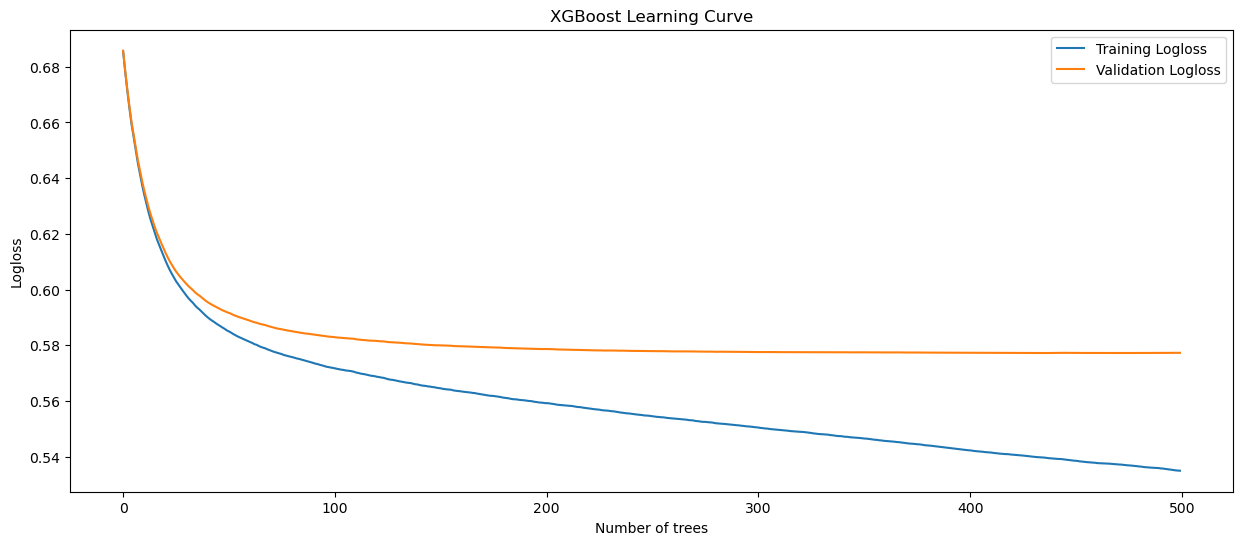

Final Training Logloss: 0.5350
Final Validation Logloss: 0.5773


In [202]:
#  Plot the learning curve
plt.figure(figsize=(15, 6))
plt.plot(train_errors, label='Training Logloss')
plt.plot(val_errors, label='Validation Logloss')
plt.xlabel('Number of trees')
plt.ylabel('Logloss')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()

# Print the final logloss for training and validation
print(f"Final Training Logloss: {train_errors[-1]:.4f}")
print(f"Final Validation Logloss: {val_errors[-1]:.4f}")


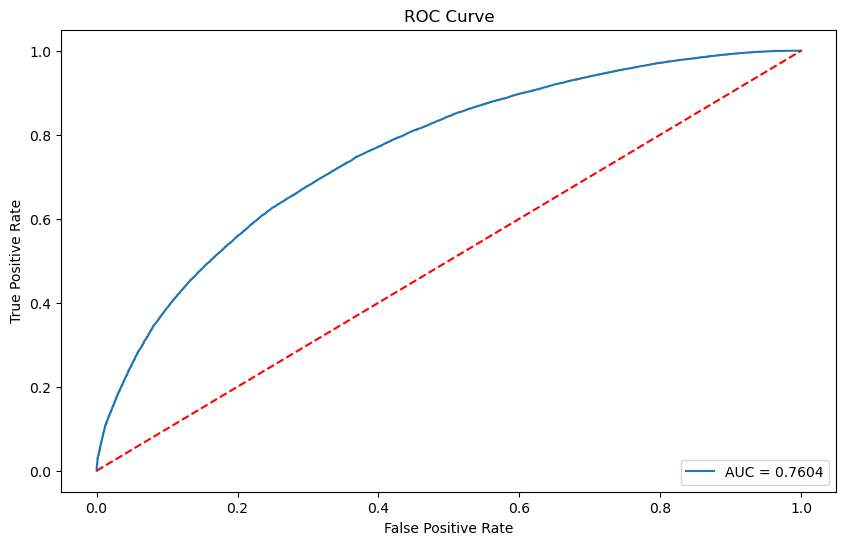

In [203]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_score:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


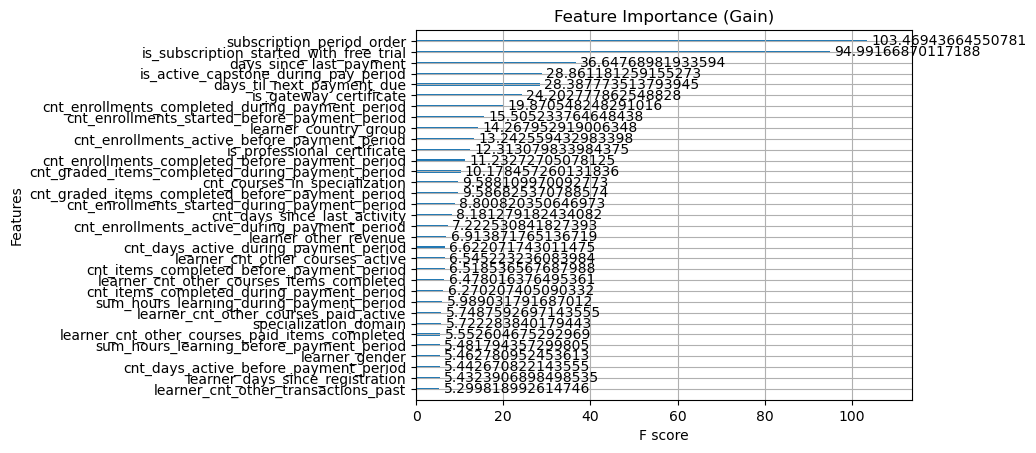

In [204]:
importance = xgb_model.get_booster().get_score(importance_type='gain')
xgb.plot_importance(xgb_model, importance_type='gain', title='Feature Importance (Gain)')
plt.show()


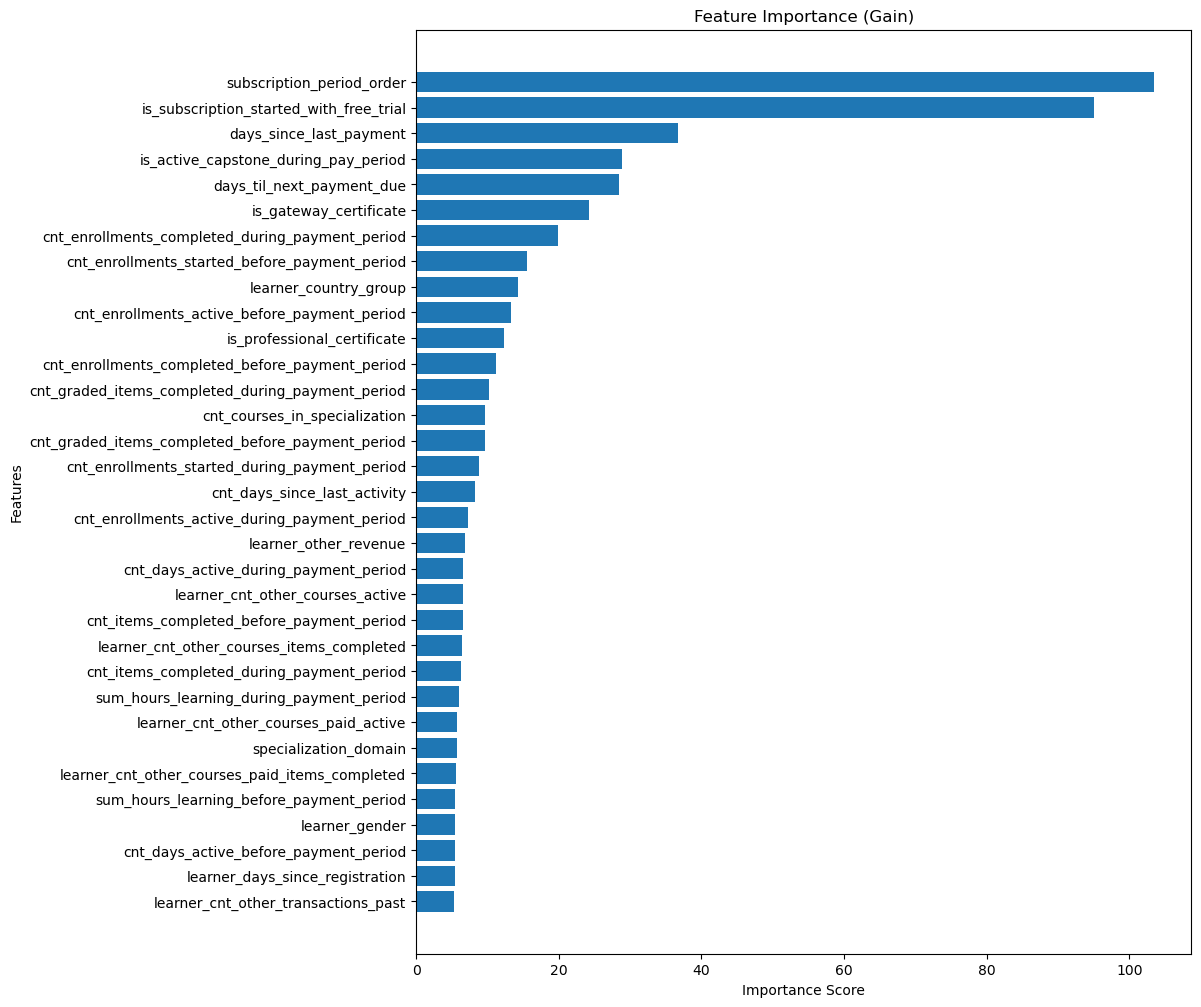

In [205]:

# Sort features based on importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Separate feature names and their importance scores
features, scores = zip(*sorted_importance)

# Plot
plt.figure(figsize=(10, 12))
plt.barh(features, scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Gain)')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


## **Predictions🎯**

In [209]:
test.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
test['ID']


0            0
1            1
2            2
3            3
4            4
         ...  
82786    82786
82787    82787
82788    82788
82789    82789
82790    82790
Name: ID, Length: 82791, dtype: int64

In [210]:
ID = test['ID']
test = test.drop(columns=['ID','subscription_id', 'observation_dt', 'specialization_id'])
test

,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,7,Business,False,False,594,India,unknown,50,0,104,...,1,5,20,1,True,124.216667,1.500000,38,2,9
1,6,Information Technology,True,False,601,Northern Europe,unknown,16,11,573,...,0,1,12,1,False,5.683333,4.716667,1,1,3
2,10,Information Technology,True,True,376,Southern Europe,male,7,4,383,...,1,1,36,5,False,7.833333,5.566667,5,4,0
3,6,Business,True,True,105,United States,female,0,0,0,...,0,0,0,0,False,0.100000,0.000000,1,0,9
4,8,Data Science,True,True,369,India,unknown,6,0,170,...,0,0,0,0,False,38.266667,0.000000,14,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82786,6,Business,True,True,1665,Australia and New Zealand,unknown,0,0,0,...,0,0,0,0,False,3.083333,0.000000,3,0,133
82787,9,Data Science,True,True,2782,United States,male,11,3,228,...,0,0,0,0,False,12.400000,0.000000,7,0,28
82788,6,Information Technology,True,False,455,United States,female,6,3,136,...,0,0,0,0,False,4.233333,0.000000,11,0,34
82789,5,Information Technology,True,True,1229,East Asia,unknown,3,0,18,...,0,1,36,3,False,11.466667,6.650000,17,5,1


In [211]:
numerical_cols_test = test.select_dtypes(include=['float64', 'int64']).columns.difference(['ID']).tolist()
categorical_cols_test = test.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

In [212]:
test[numerical_cols_test] = scaler.transform(test[numerical_cols_test])
test[numerical_cols_test]

,cnt_courses_in_specialization,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity,cnt_enrollments_active_before_payment_period,cnt_enrollments_active_during_payment_period,cnt_enrollments_completed_before_payment_period,cnt_enrollments_completed_during_payment_period,cnt_enrollments_started_before_payment_period,cnt_enrollments_started_during_payment_period,...,learner_cnt_other_courses_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_days_since_registration,learner_other_revenue,subscription_period_order,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period
0,0.610040,1.347703,-0.145336,-0.383932,2.826794,4.547615,3.017342,1.166792,2.611867,0.993437,...,3.230122,-0.034160,-0.342155,-0.323633,-0.300523,-0.159436,-0.285586,-0.627353,3.958731,-0.234033
1,0.041534,-0.606169,-0.391222,-0.498650,-0.400252,0.334599,-0.548682,-0.359022,-0.553373,-0.396842,...,0.766761,1.512808,2.592565,2.478369,0.004687,-0.152074,-0.046211,-0.627353,-0.362086,0.145809
2,2.315559,-0.394939,0.346436,-0.556008,0.245157,0.334599,0.164523,1.166792,0.079675,-0.396842,...,0.114695,0.886104,0.725016,0.589840,0.004687,-0.388705,0.014990,-0.627353,-0.283714,0.246182
3,0.041534,-0.606169,-0.637108,-0.383932,-0.400252,-0.718655,-0.548682,-0.359022,-0.553373,-0.396842,...,-0.392467,-0.377197,-0.342155,-0.323633,-0.300523,-0.673713,-0.285586,-0.627353,-0.565612,-0.411162
4,1.178547,0.080327,-0.637108,-0.345693,2.826794,-0.718655,1.590933,-0.359022,3.244915,-0.396842,...,0.042244,0.183537,-0.342155,-0.323633,-0.300523,-0.396067,-0.285586,-0.202326,0.825653,-0.411162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82786,0.041534,-0.500554,-0.637108,1.986893,-0.400252,-0.718655,-0.548682,-0.359022,-0.553373,-0.396842,...,-0.392467,-0.377197,-0.342155,-0.323633,-0.300523,0.966925,-0.285586,1.072756,-0.456862,-0.411162
82787,1.747053,-0.289325,-0.637108,-0.020661,1.535975,-0.718655,-0.548682,-0.359022,1.345771,-0.396842,...,0.404503,0.374846,0.458223,0.569313,0.157293,2.141664,0.100093,-0.202326,-0.117248,-0.411162
82788,0.041534,-0.078095,-0.637108,0.094056,-0.400252,-0.718655,-0.548682,-0.359022,0.079675,-0.396842,...,0.042244,0.071390,0.458223,0.287060,0.462503,-0.305621,0.256195,-0.202326,-0.414942,-0.411162
82789,-0.526973,0.238749,0.592322,-0.536889,-0.400252,0.334599,-0.548682,-0.359022,-0.553373,-0.396842,...,-0.175112,-0.317826,-0.342155,-0.323633,-0.300523,0.508388,-0.285586,-0.202326,-0.151270,0.374108


In [213]:
# Label encode the test data
for col in categorical_cols_test:
    le = label_encoders[col]
    
    # For test data, handle unseen labels using a try-except block
    try:
        test[col] = le.transform(test[col].astype(str))
    except:
        # If there are unseen labels in the test set, set them to -1
        test[col] = test[col].map(lambda s: le.classes_.index(s) if s in le.classes_ else -1)

In [214]:
test

,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,0.610040,1,0,0,-0.159436,7,3,3.230122,-0.342155,-0.034160,...,1.166792,4.547615,-0.021186,-0.168938,1,3.958731,-0.234033,1.347703,-0.145336,-0.383932
1,0.041534,5,1,0,-0.152074,10,3,0.766761,2.592565,1.512808,...,-0.359022,0.334599,-0.180226,-0.168938,0,-0.362086,0.145809,-0.606169,-0.391222,-0.498650
2,2.315559,5,1,1,-0.388705,13,1,0.114695,0.725016,0.886104,...,1.166792,0.334599,0.296893,0.736532,0,-0.283714,0.246182,-0.394939,0.346436,-0.556008
3,0.041534,1,1,1,-0.673713,14,0,-0.392467,-0.342155,-0.377197,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.565612,-0.411162,-0.606169,-0.637108,-0.383932
4,1.178547,3,1,1,-0.396067,7,3,0.042244,-0.342155,0.183537,...,-0.359022,-0.718655,-0.418786,-0.395306,0,0.825653,-0.411162,0.080327,-0.637108,-0.345693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82786,0.041534,1,1,1,0.966925,1,3,-0.392467,-0.342155,-0.377197,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.456862,-0.411162,-0.500554,-0.637108,1.986893
82787,1.747053,3,1,1,2.141664,14,1,0.404503,0.458223,0.374846,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.117248,-0.411162,-0.289325,-0.637108,-0.020661
82788,0.041534,5,1,0,-0.305621,14,0,0.042244,0.458223,0.071390,...,-0.359022,-0.718655,-0.418786,-0.395306,0,-0.414942,-0.411162,-0.078095,-0.637108,0.094056
82789,-0.526973,5,1,1,0.508388,5,3,-0.175112,-0.342155,-0.317826,...,-0.359022,0.334599,0.296893,0.283797,0,-0.151270,0.374108,0.238749,0.592322,-0.536889


In [217]:
# Start the timer for inference
start_inference_time = time.time()
xgb_preds_vals=xgb_model.predict_proba(test[0:1])[:, 1]
catboost_preds_vals=catboost_model.predict_proba(test[0:1])[:, 1]
stacked_predictions_vals = np.column_stack((xgb_preds_vals, catboost_preds_vals))

# Predict on the test set
meta_model.predict_proba(stacked_predictions_vals[0:1])

# Stop the timer for inference
end_inference_time = time.time()

# Calculate and print the inference time
inference_time = end_inference_time - start_inference_time
print(f"Time taken for inference on the test set: {inference_time}")


Time taken for inference on the test set: 0.021953344345092773


In [220]:
xgb_preds_valss=xgb_model.predict_proba(test)[:, 1]
catboost_preds_valss=catboost_model.predict_proba(test)[:, 1]
stacked_predictions_valss = np.column_stack((xgb_preds_valss, catboost_preds_valss))
preds = meta_model.predict_proba(stacked_predictions_valss)
preds = pd.DataFrame(preds[:,1])
preds.rename(columns = {0:'is_retained'}, inplace = True)
preds.index.rename('ID', inplace=True)
preds.to_csv('submissionLast.csv')

In [221]:
preds

,is_retained
ID,
0,0.089870
1,0.345199
2,0.395587
3,0.319065
4,0.334638
...,...
82786,0.810688
82787,0.327201
82788,0.564682
